In [2]:
# Učitavanje dataset-a i provjera nedostajućih vrijednosti
import pandas as pd

file_path = r"C:\Laura\Faks\3. godina\UUI\projekt\train.csv"
data = pd.read_csv(file_path)

missing_values = data.isnull().sum()
print("Nedostajuće vrijednosti u dataset-u:")
print(missing_values)

Nedostajuće vrijednosti u dataset-u:
Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64


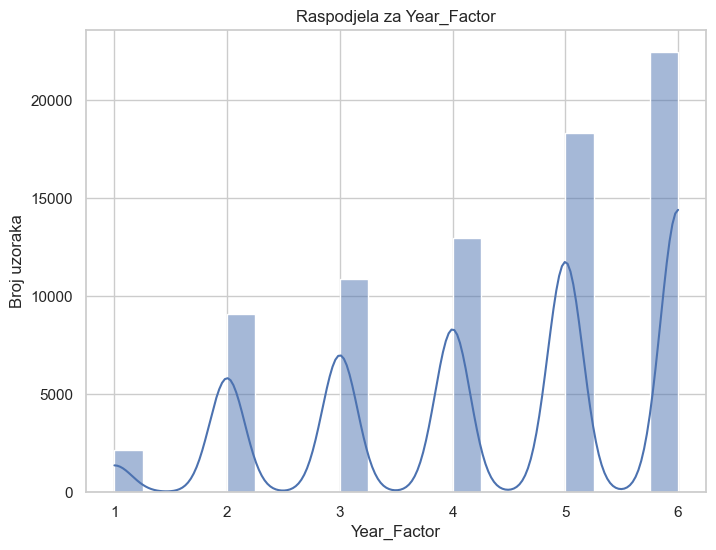

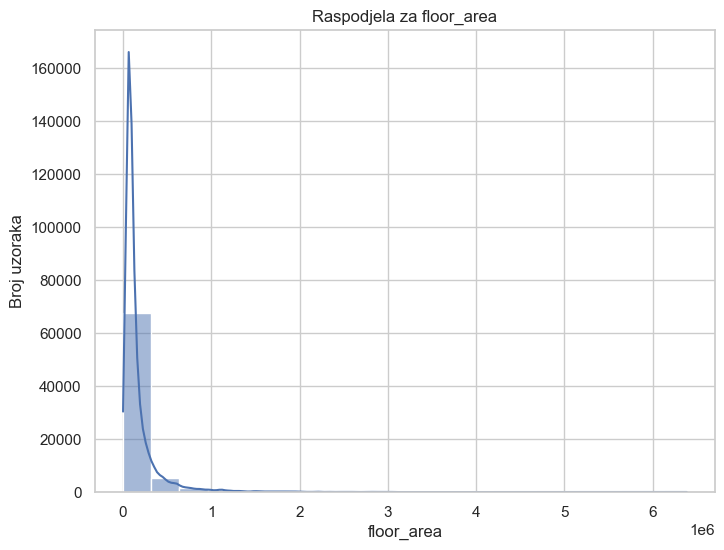

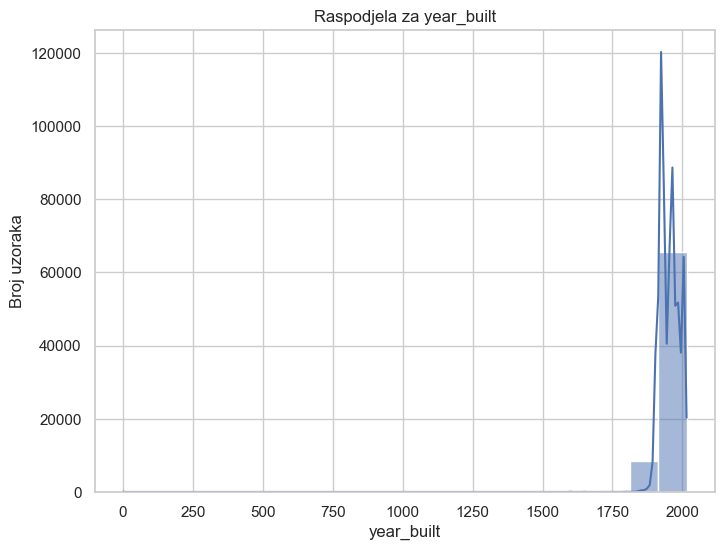

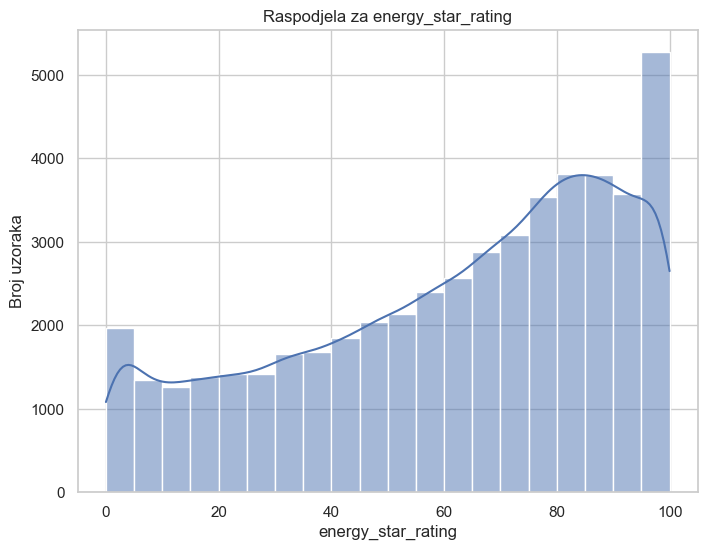

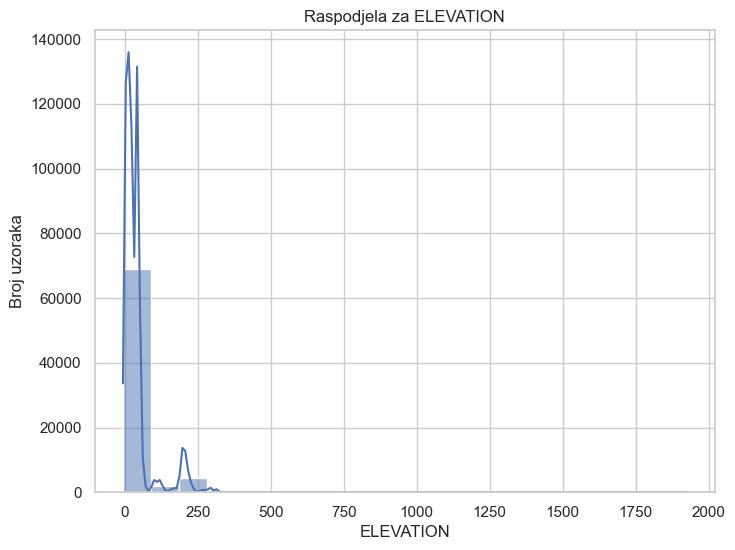

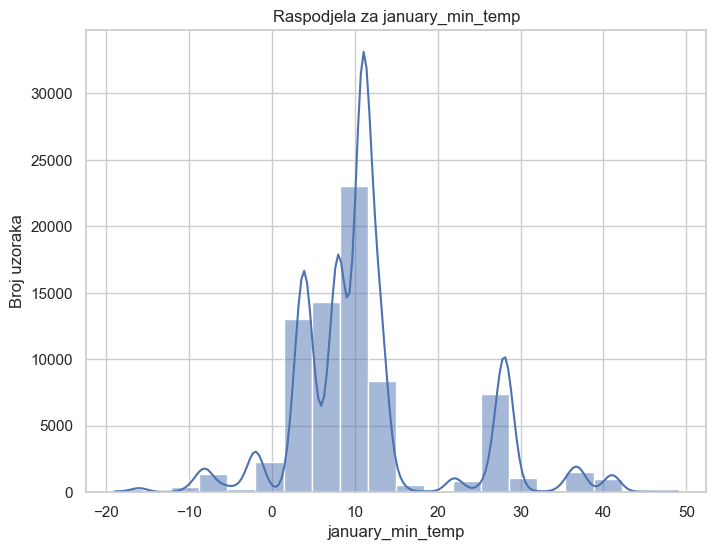

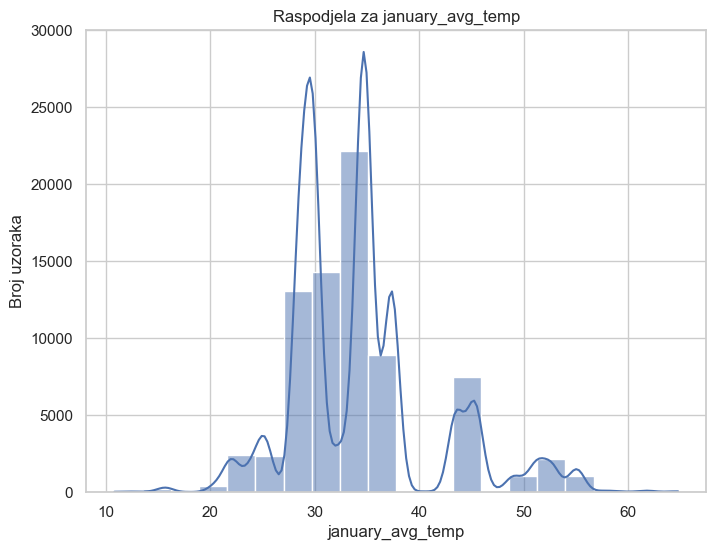

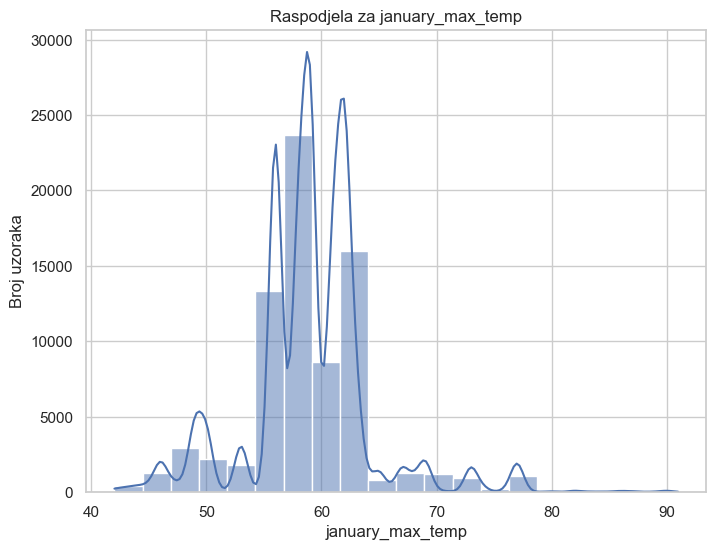

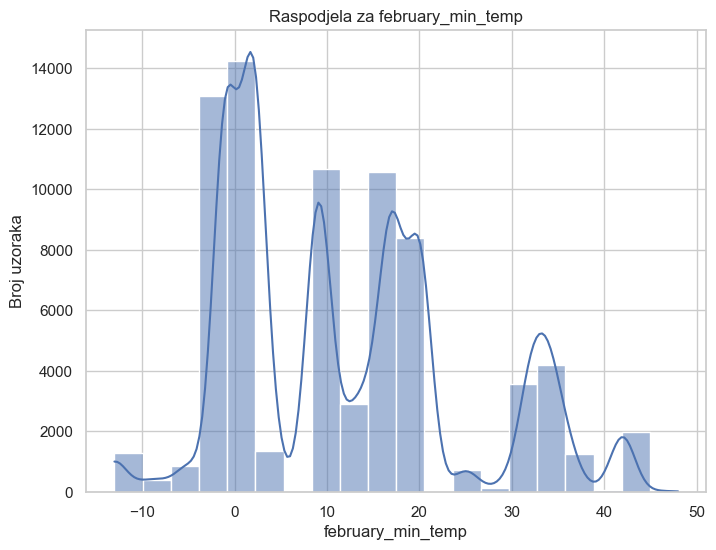

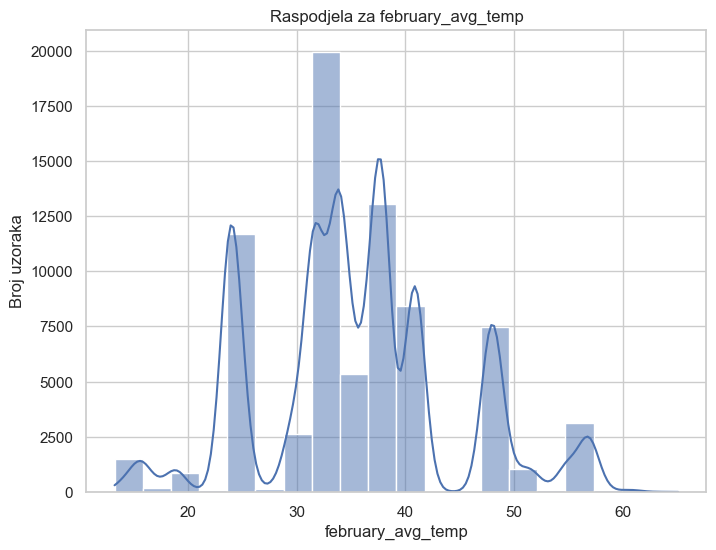

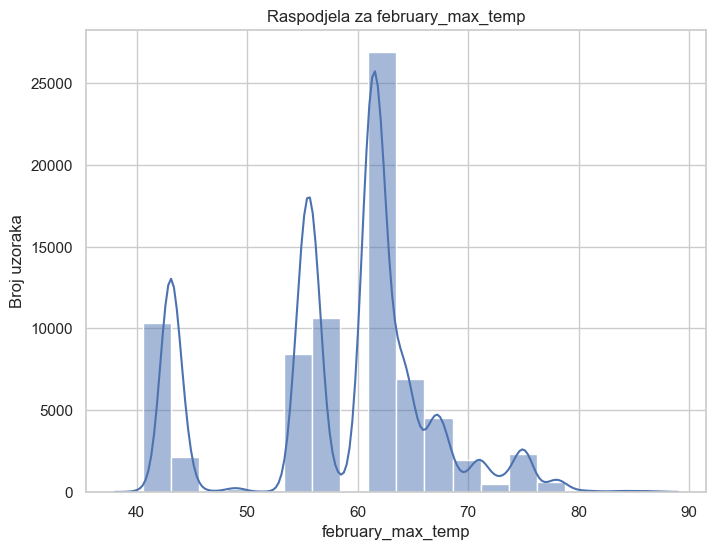

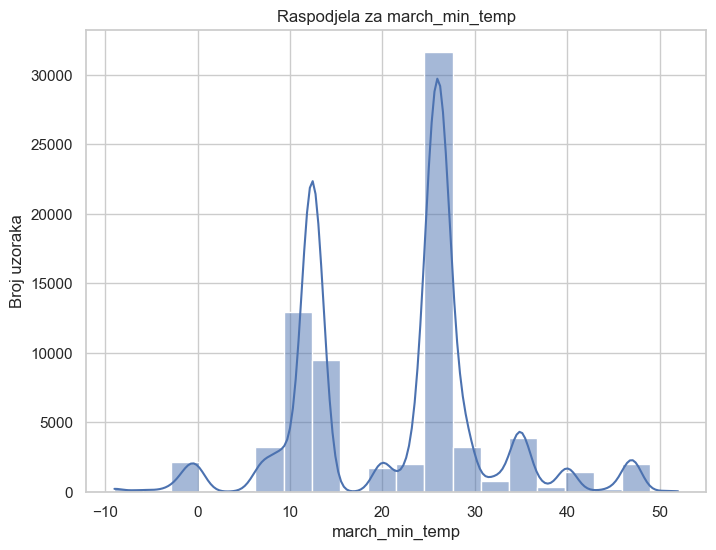

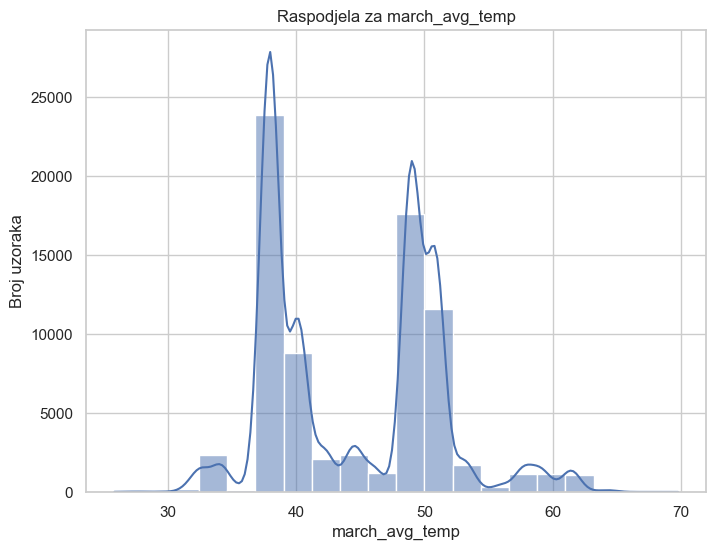

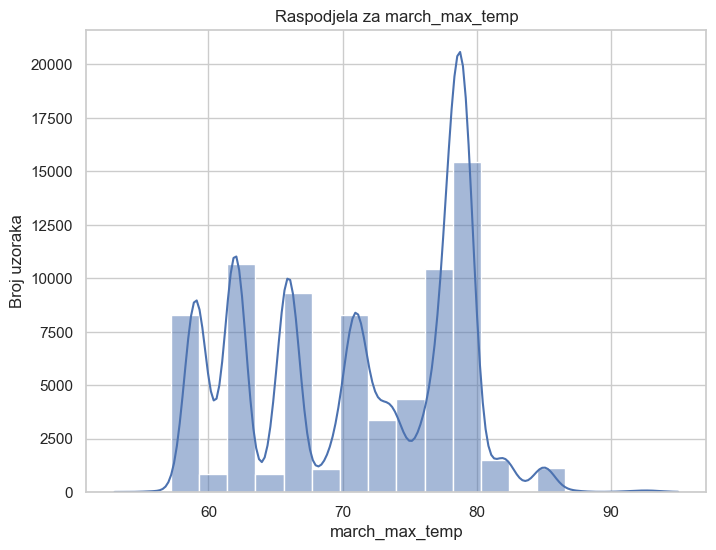

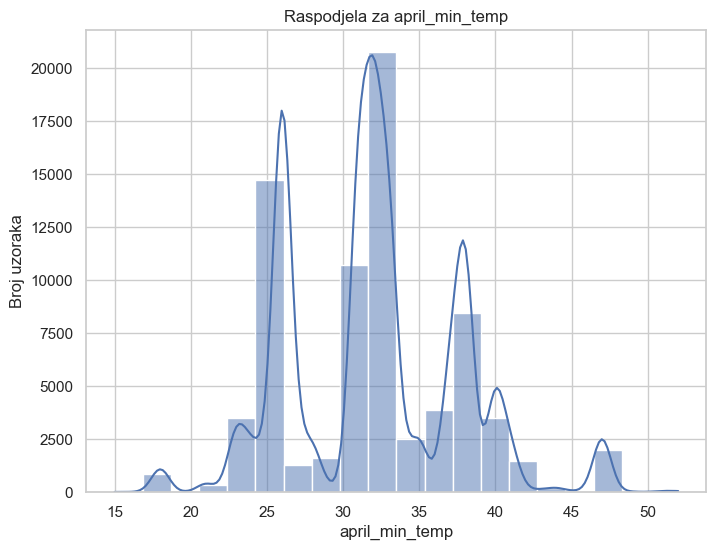

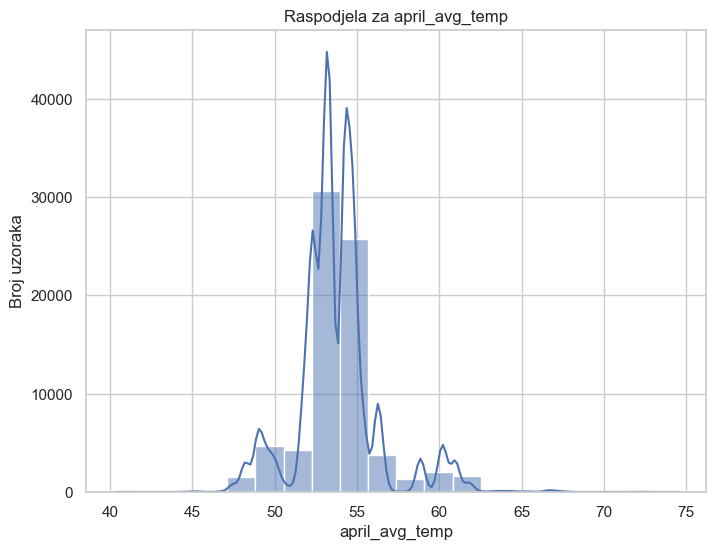

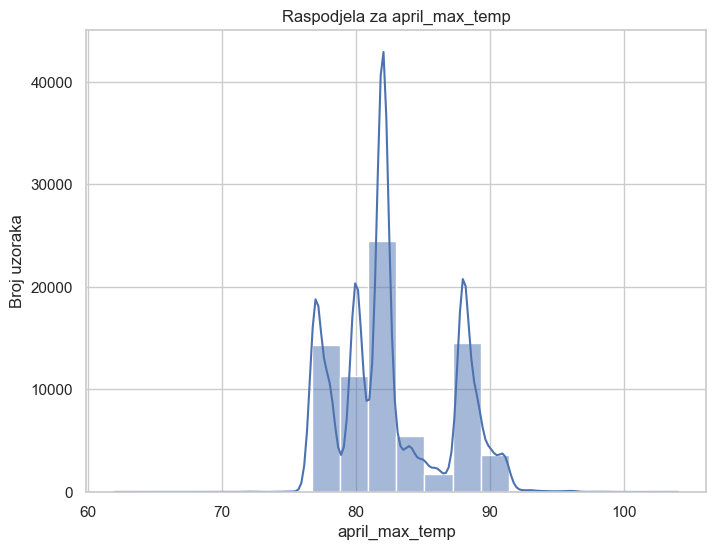

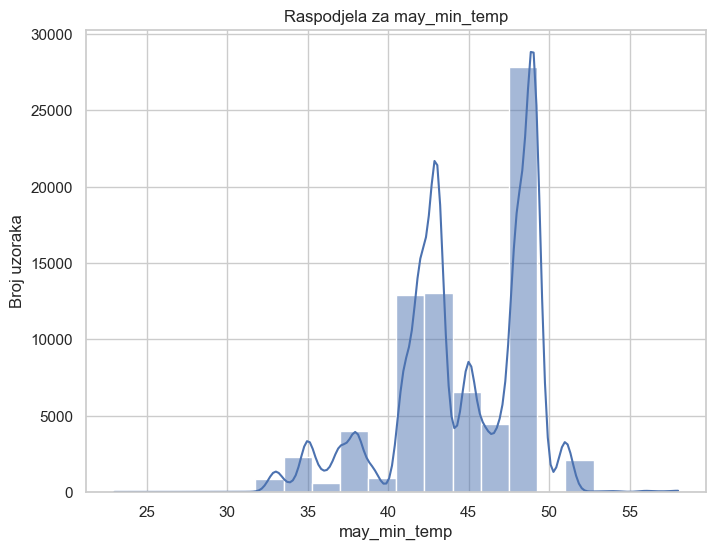

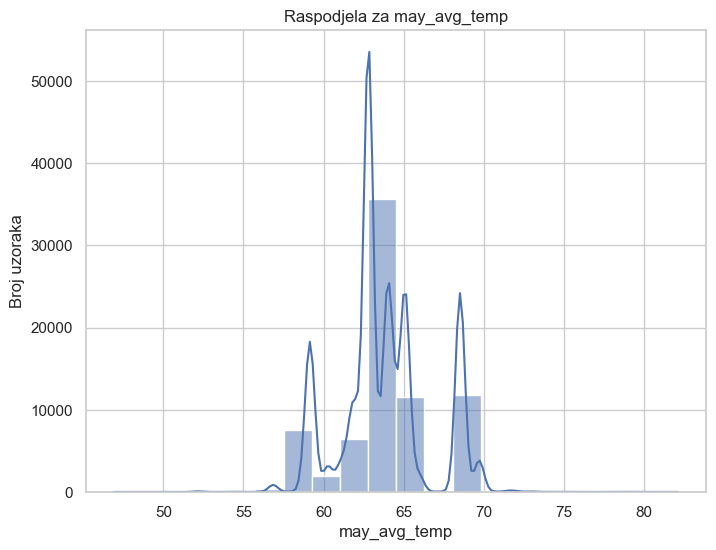

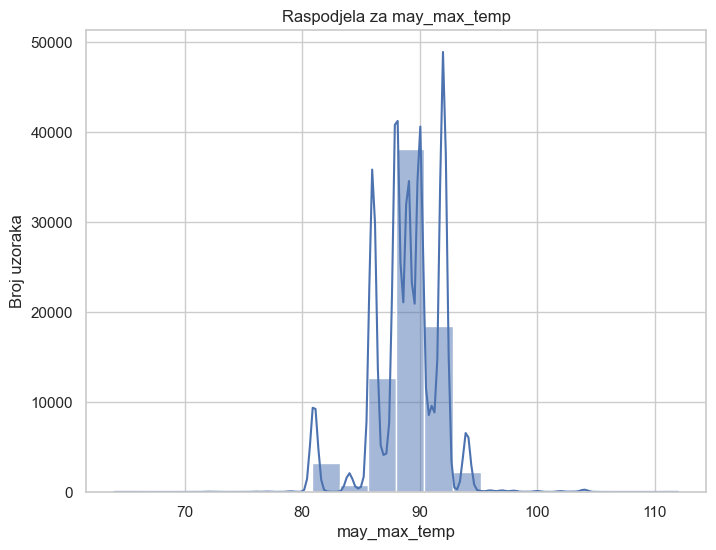

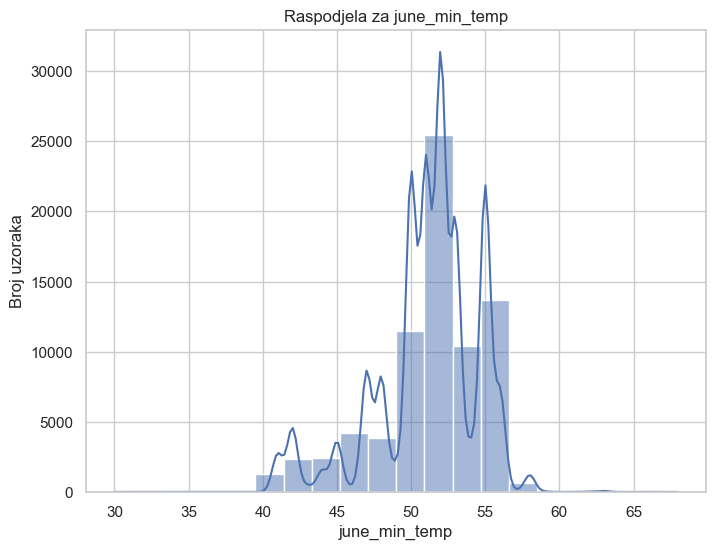

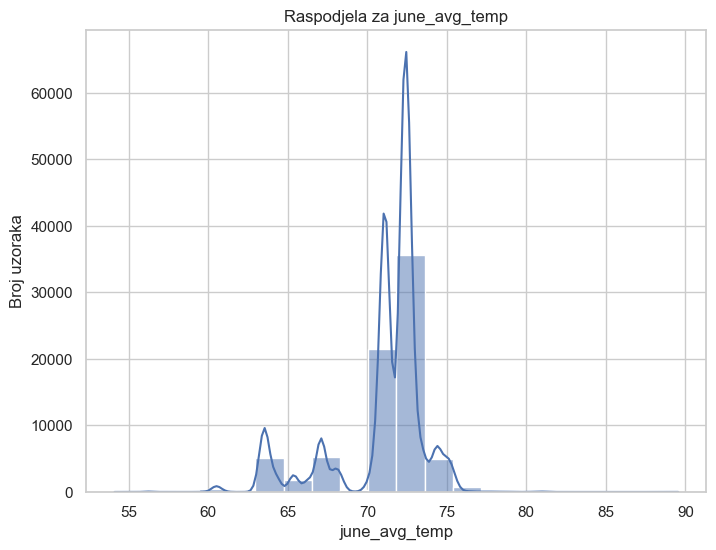

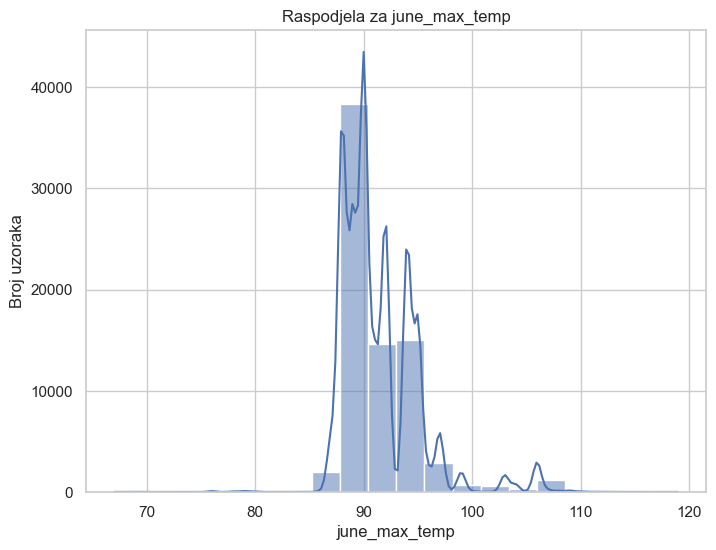

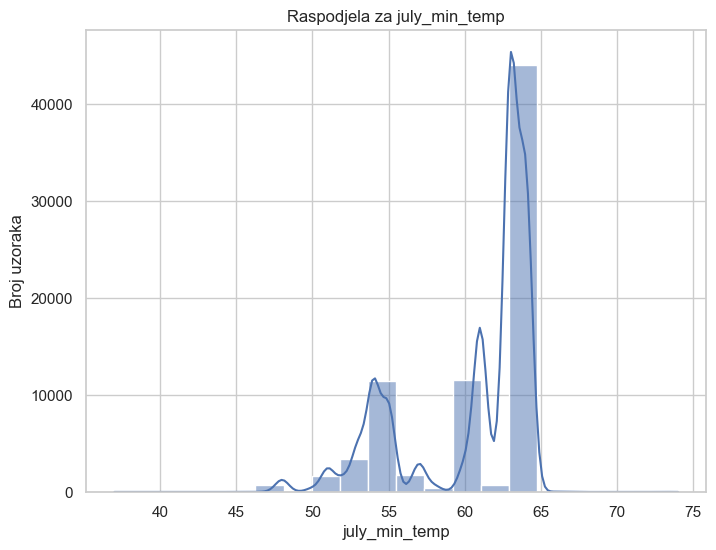

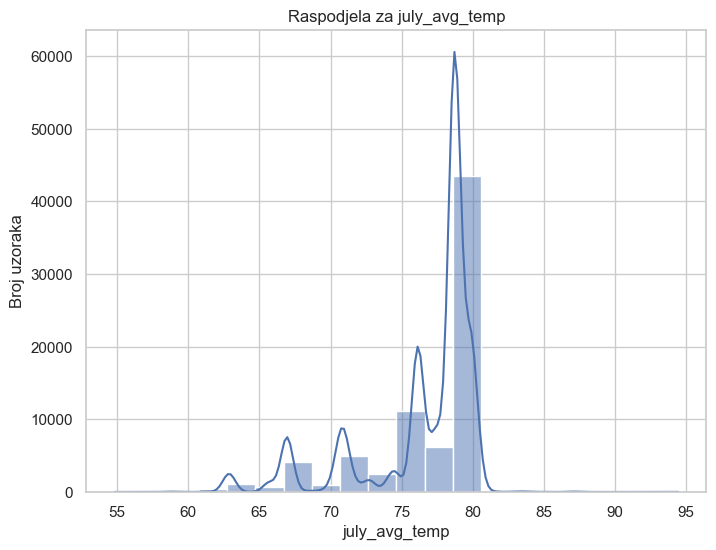

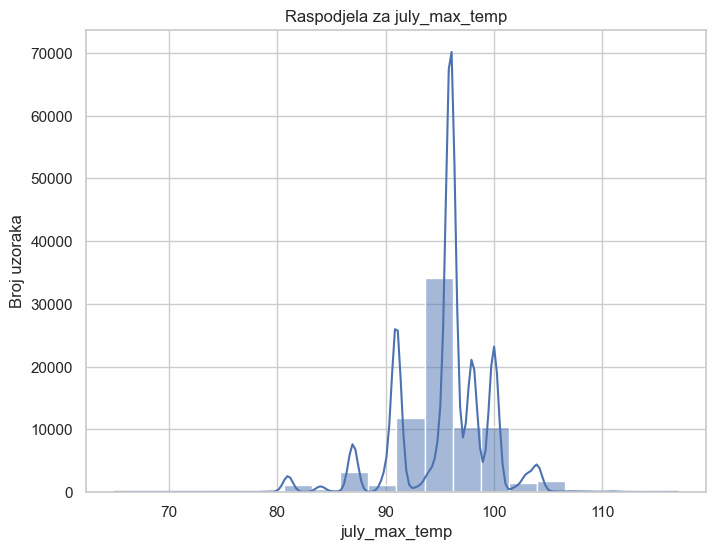

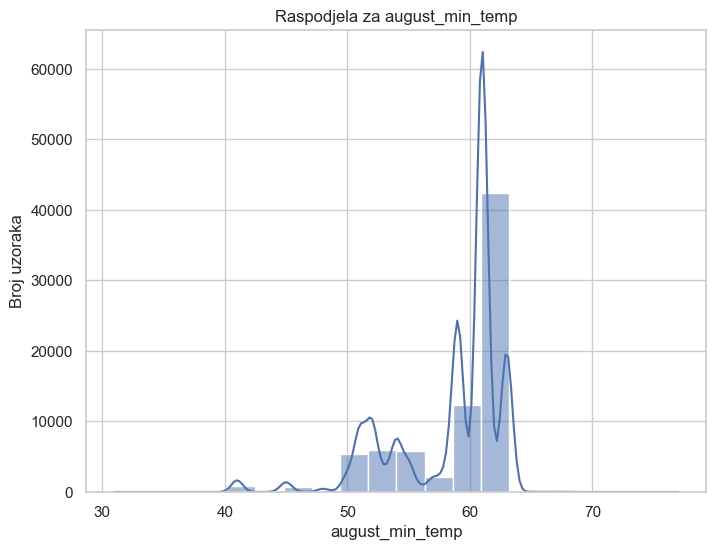

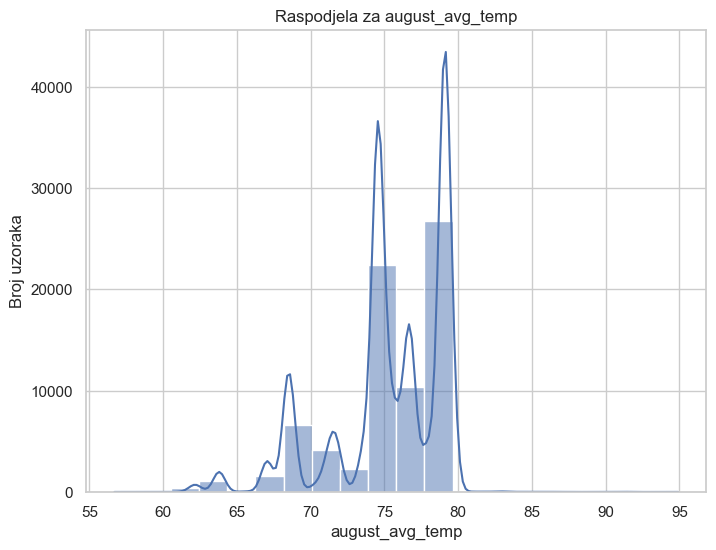

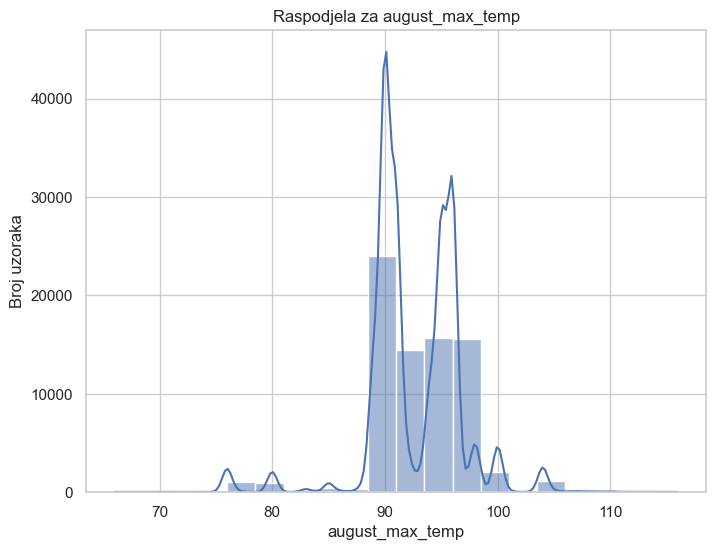

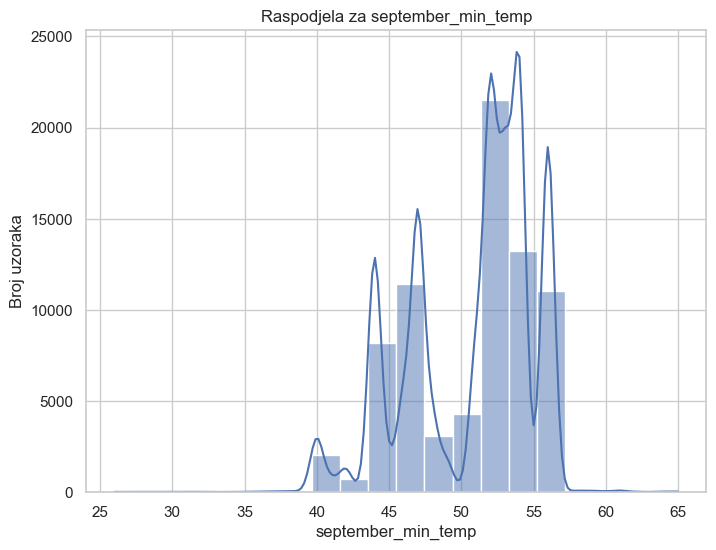

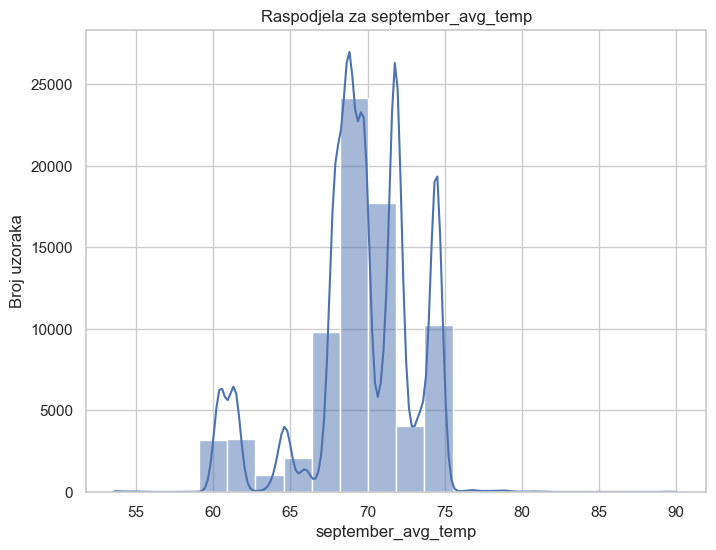

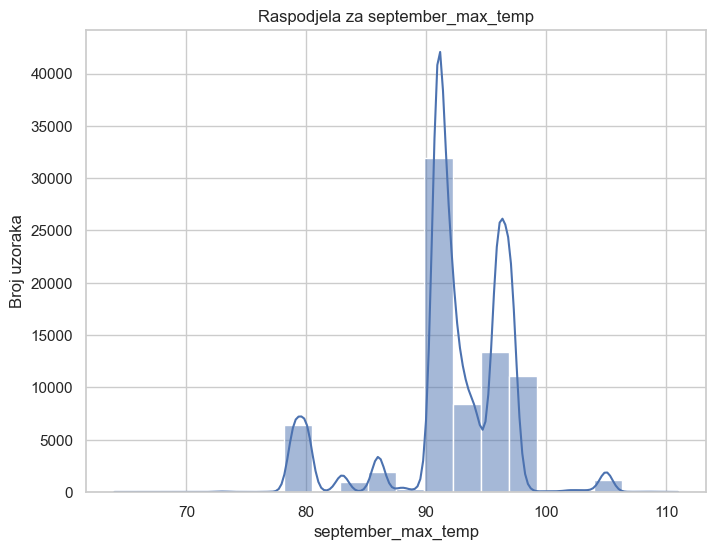

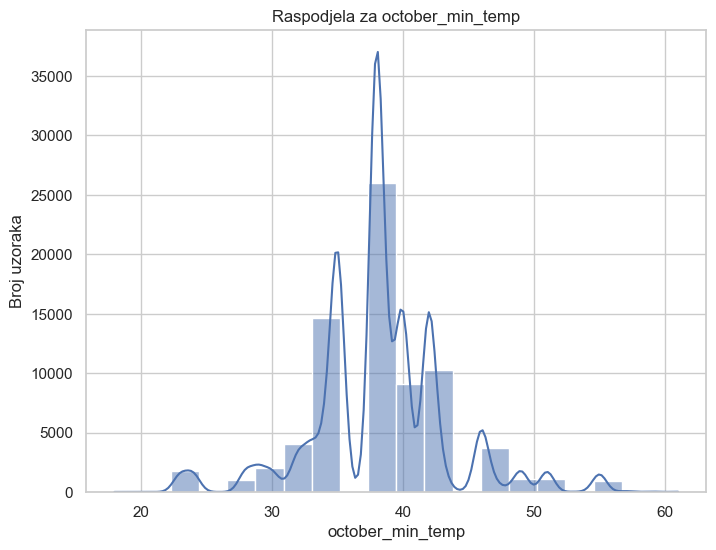

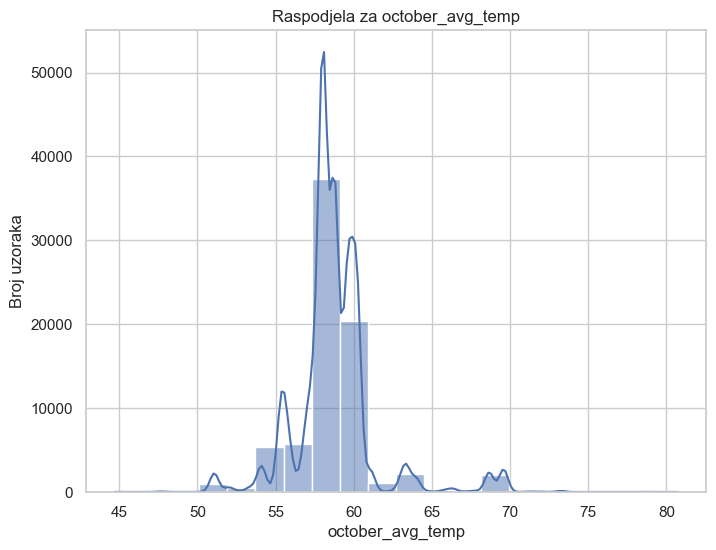

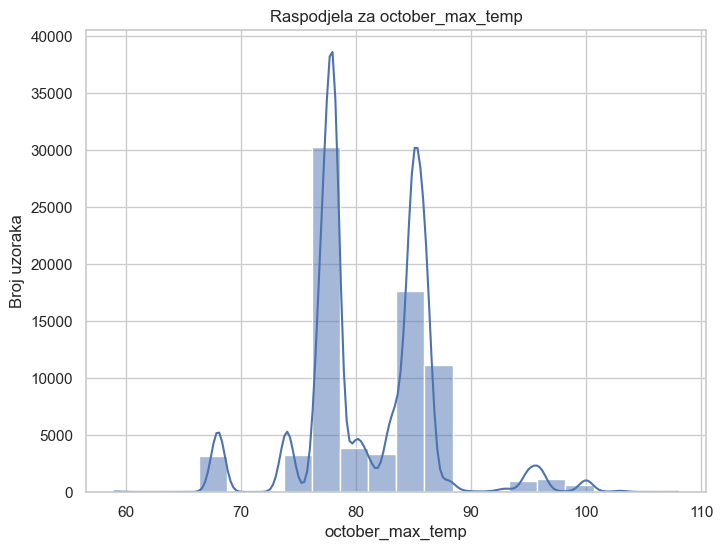

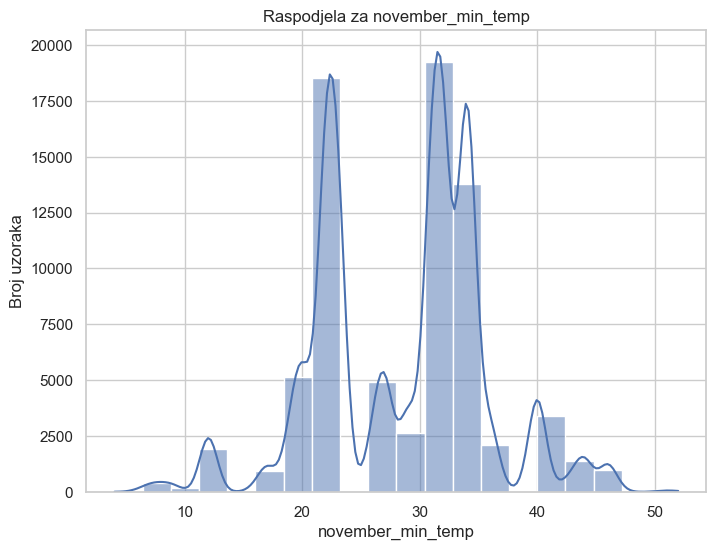

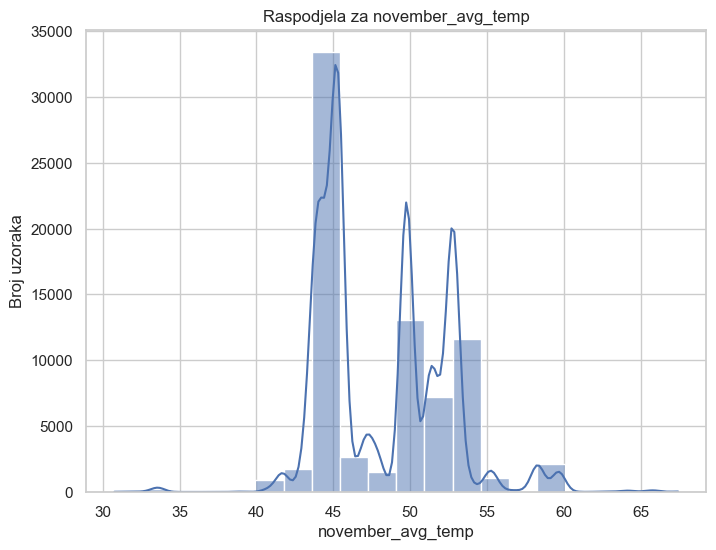

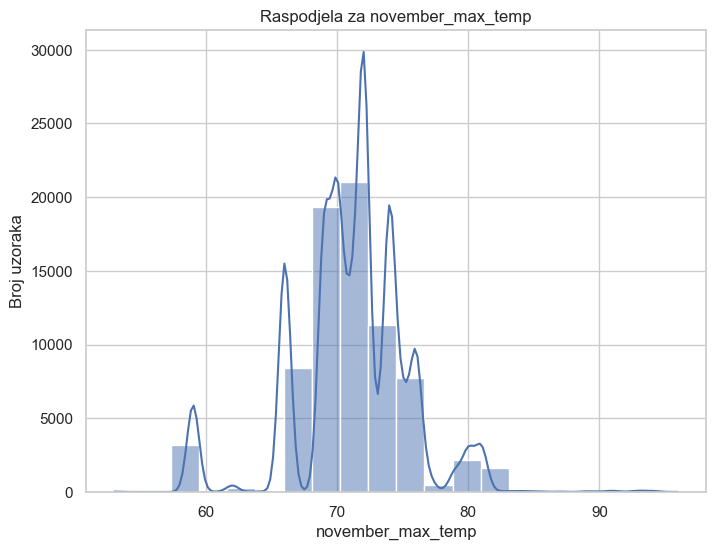

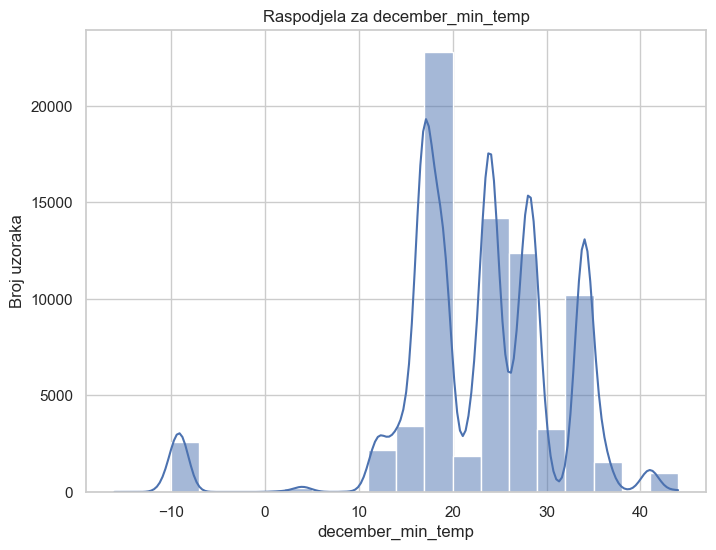

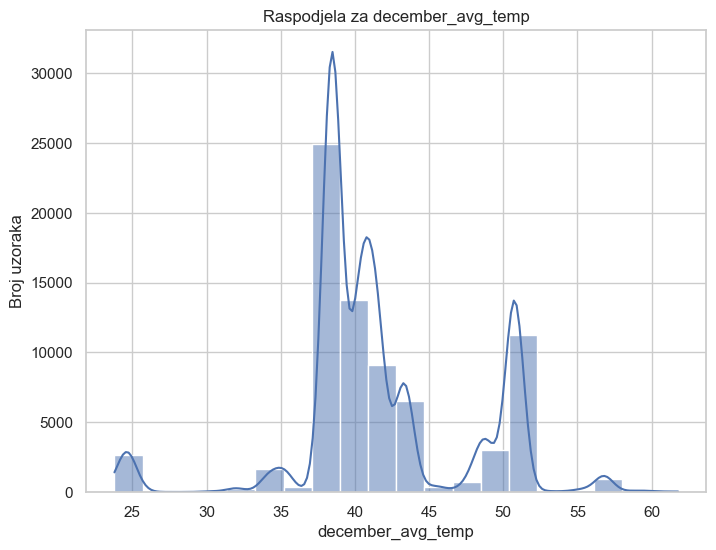

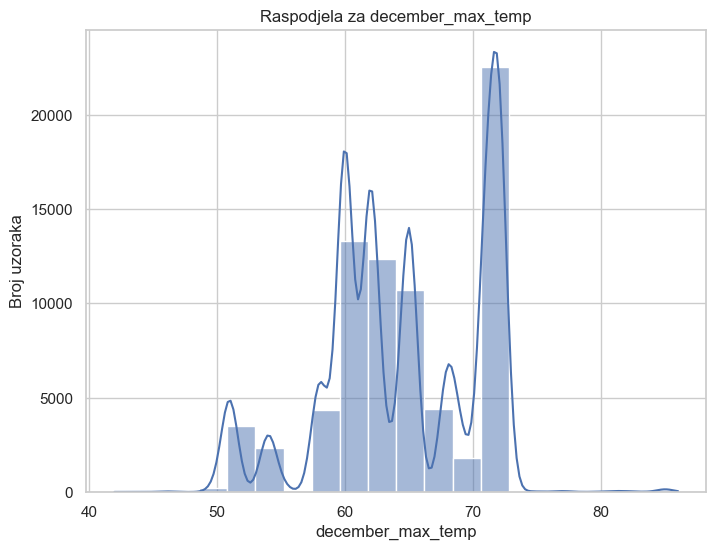

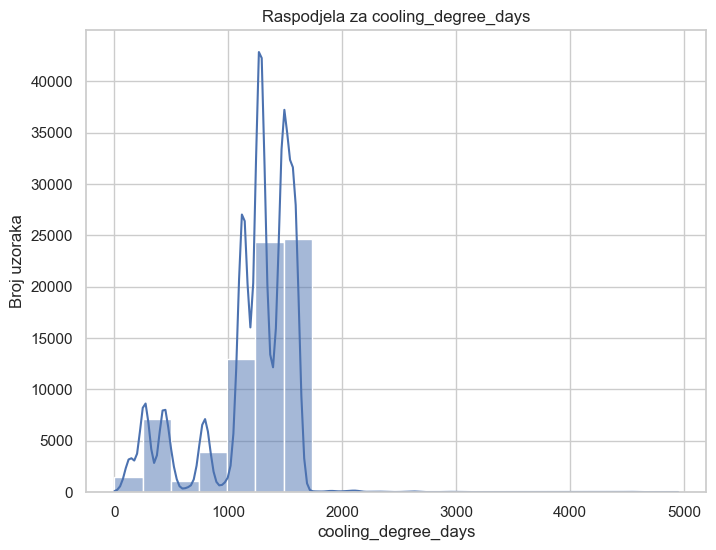

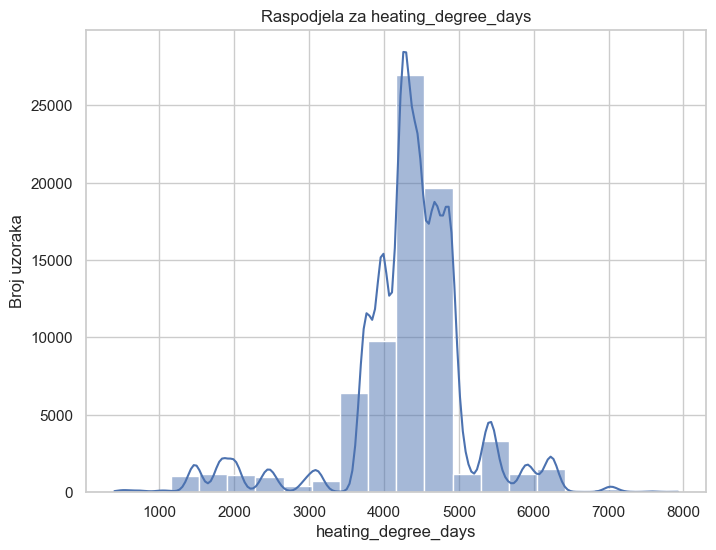

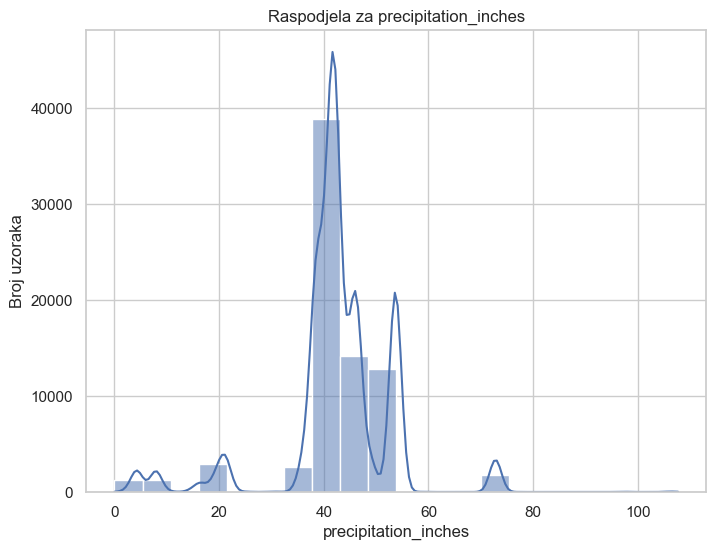

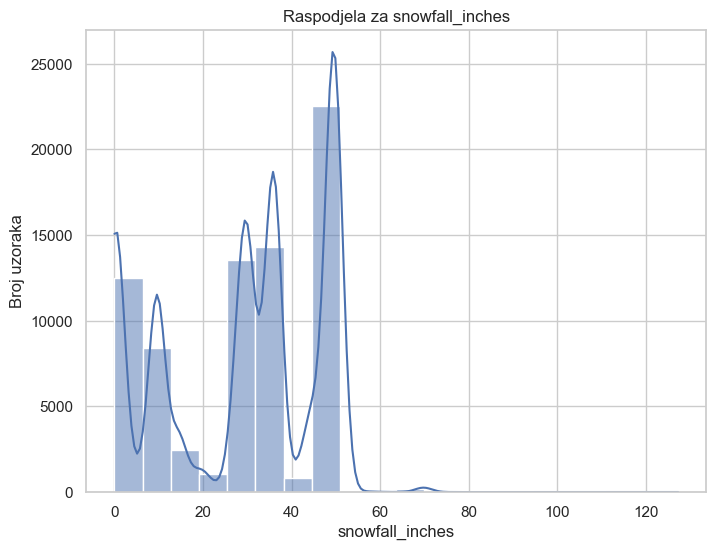

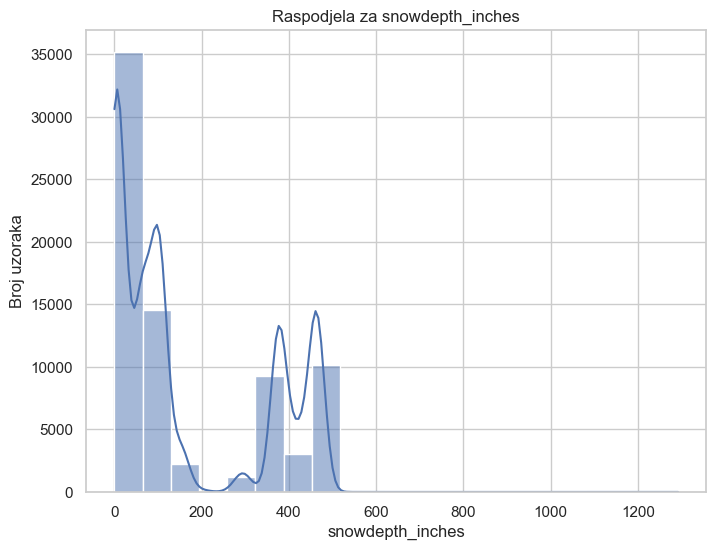

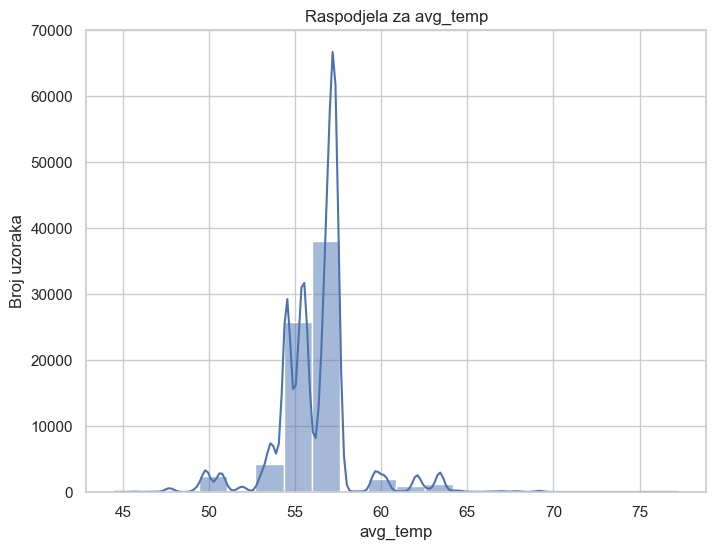

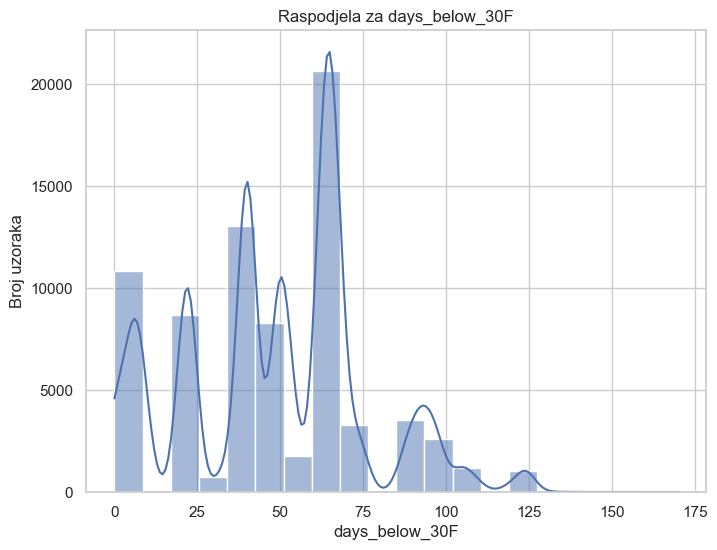

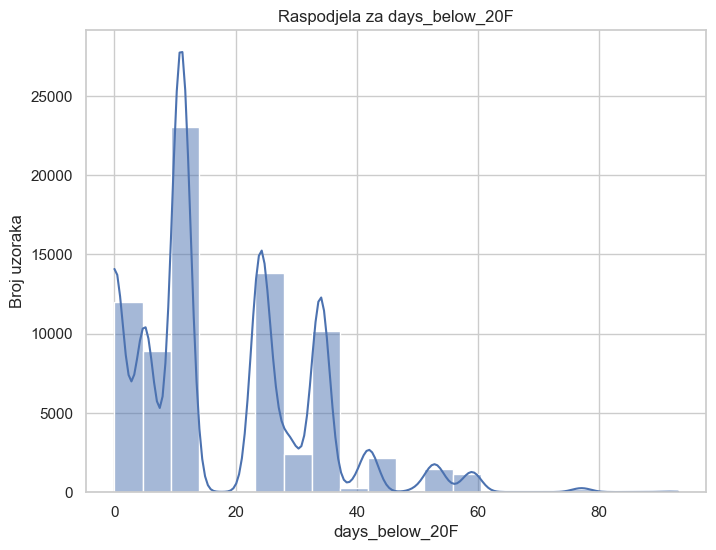

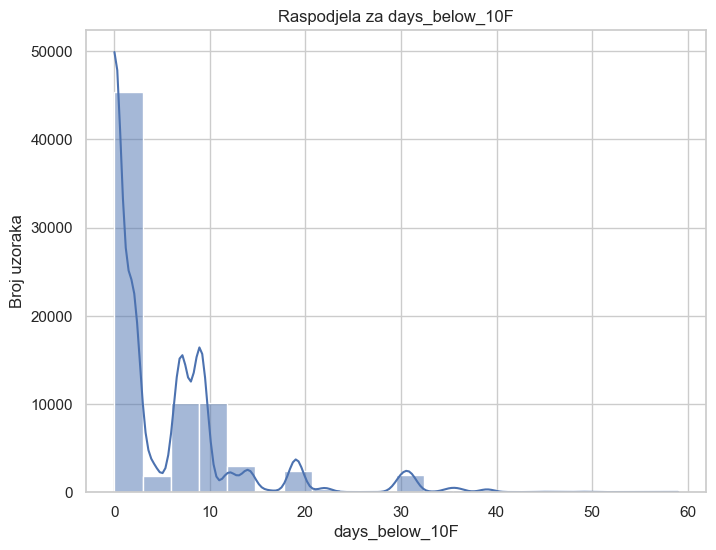

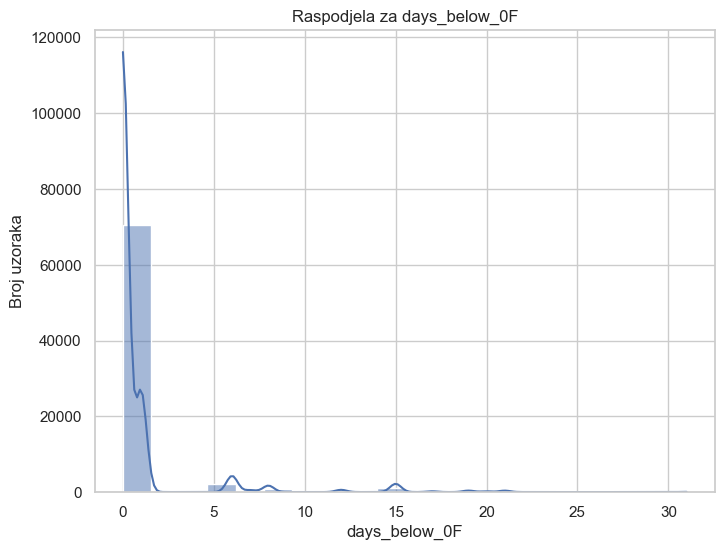

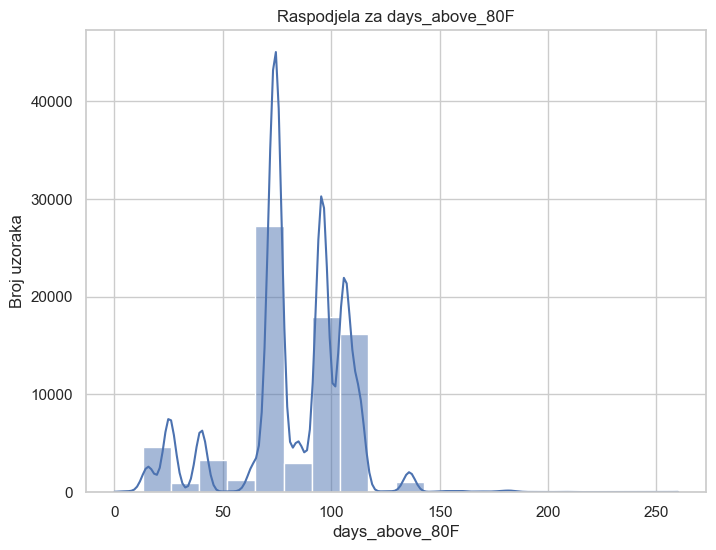

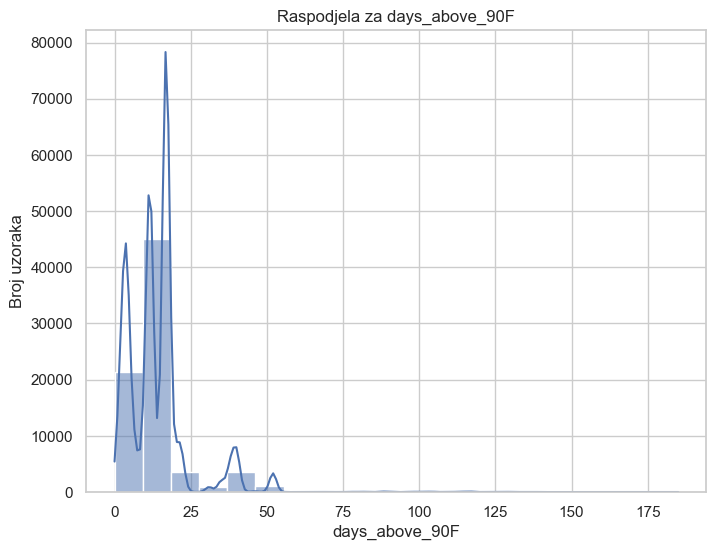

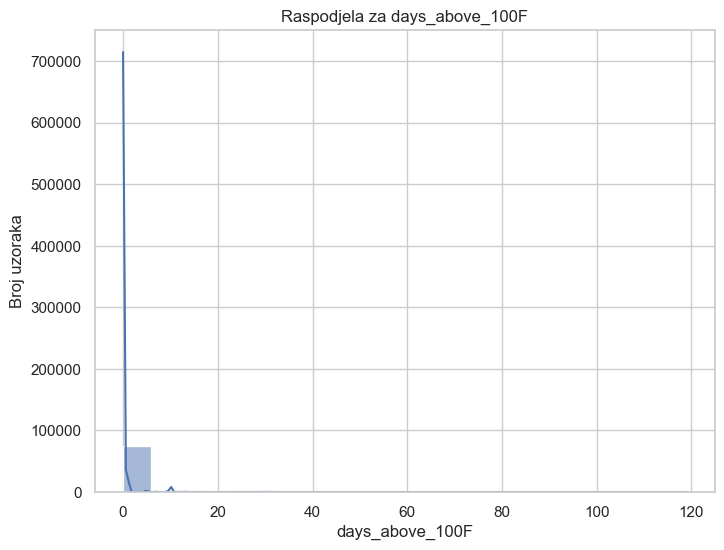

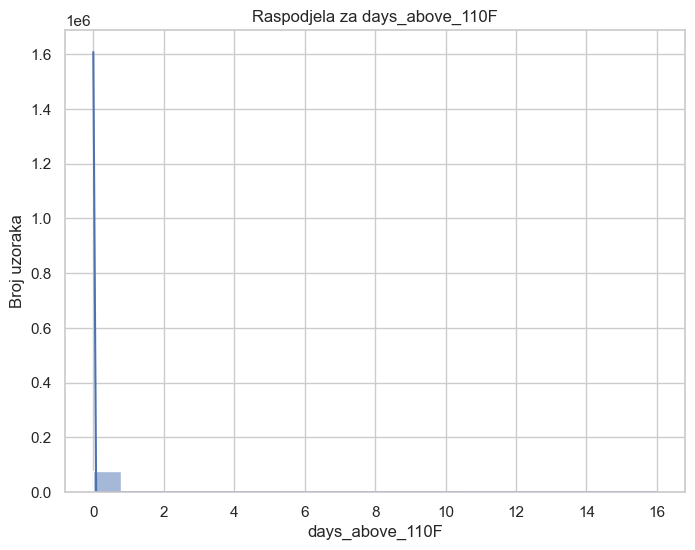

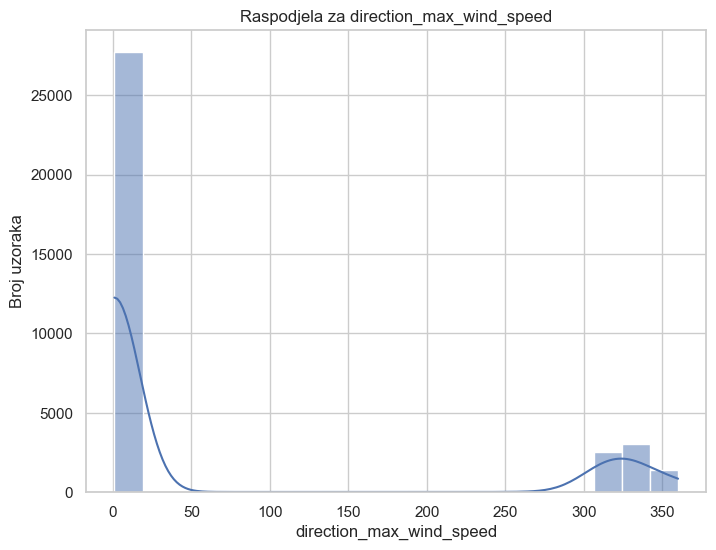

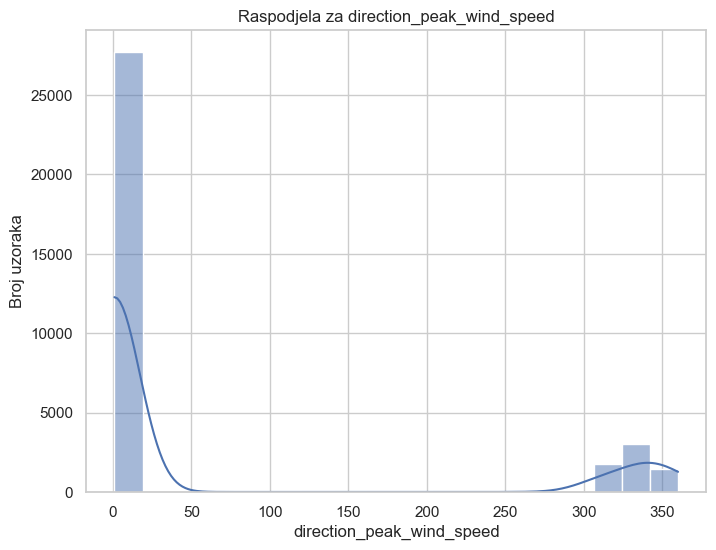

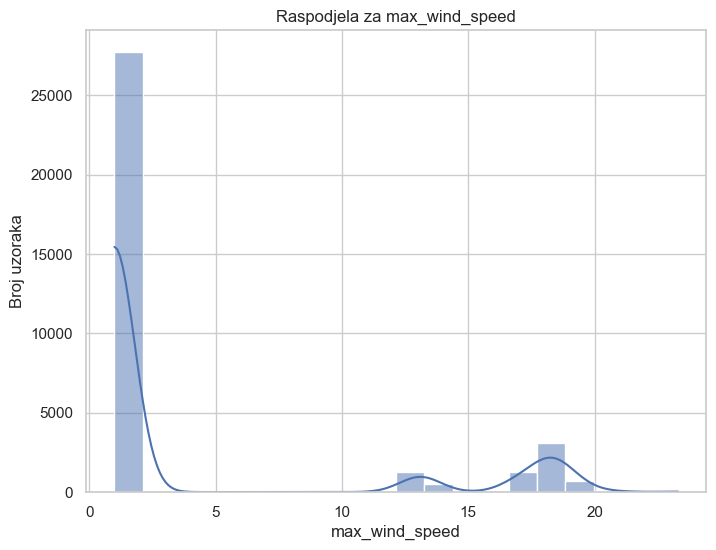

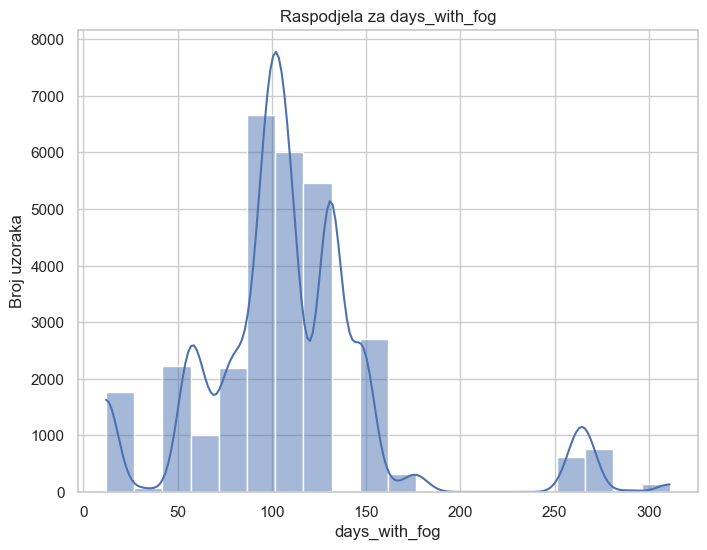

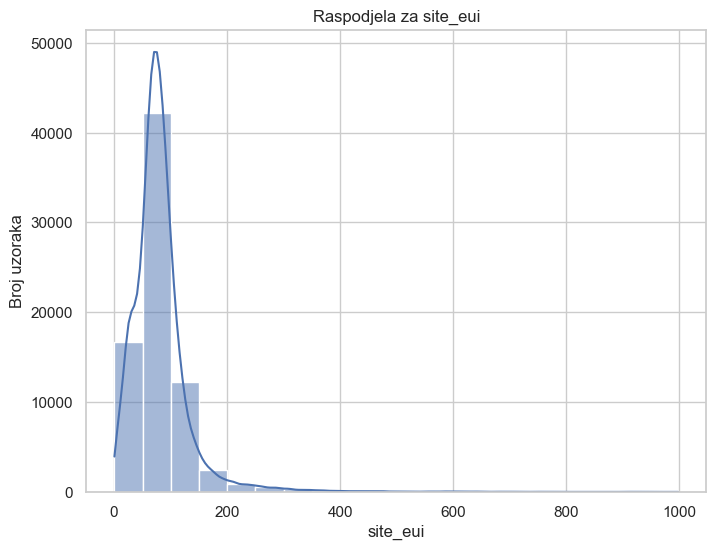

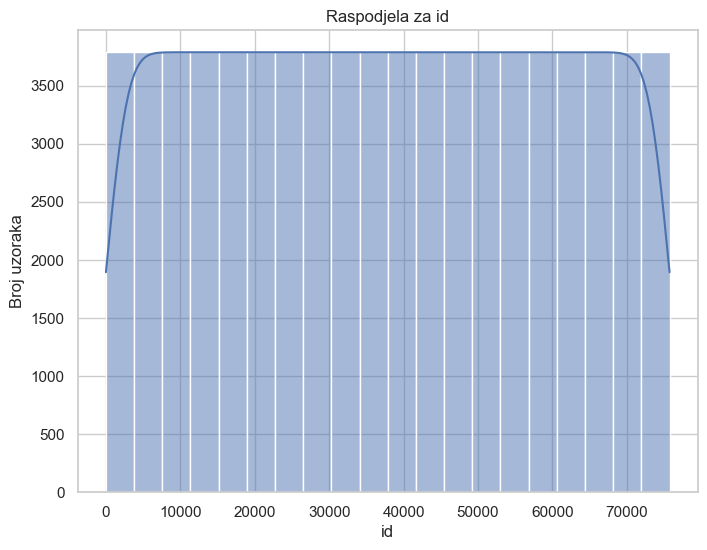

In [3]:
# Grafički prikaz numeričkih vrijednosti 
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.set(style="whitegrid")
for column in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=numeric_data, x=column, bins=20, kde=True)
    plt.title(f'Raspodjela za {column}')
    plt.xlabel(column)
    plt.ylabel('Broj uzoraka')
    plt.show() 

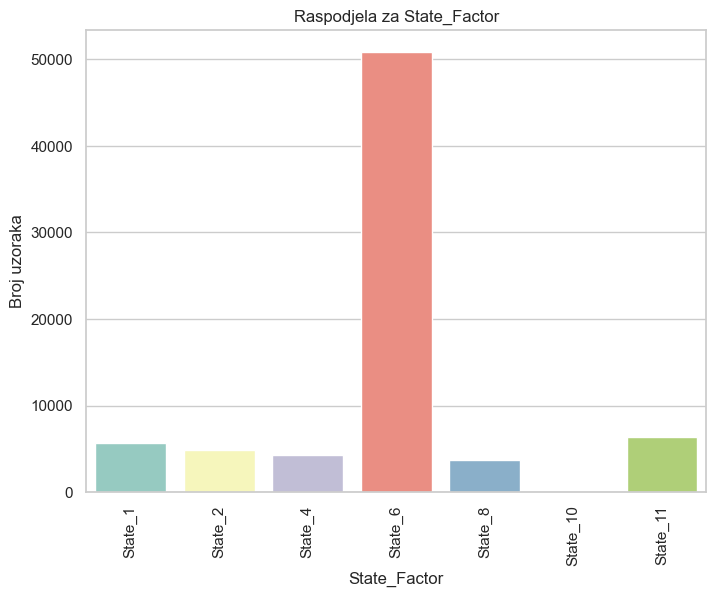

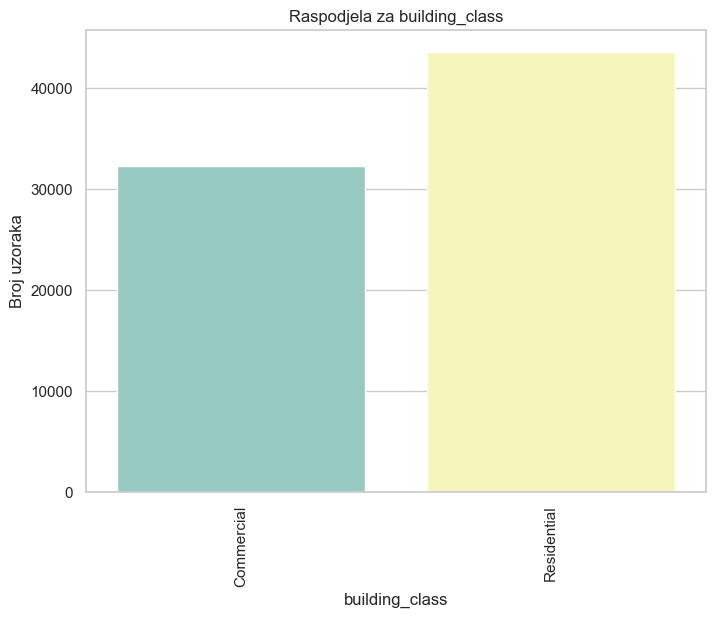

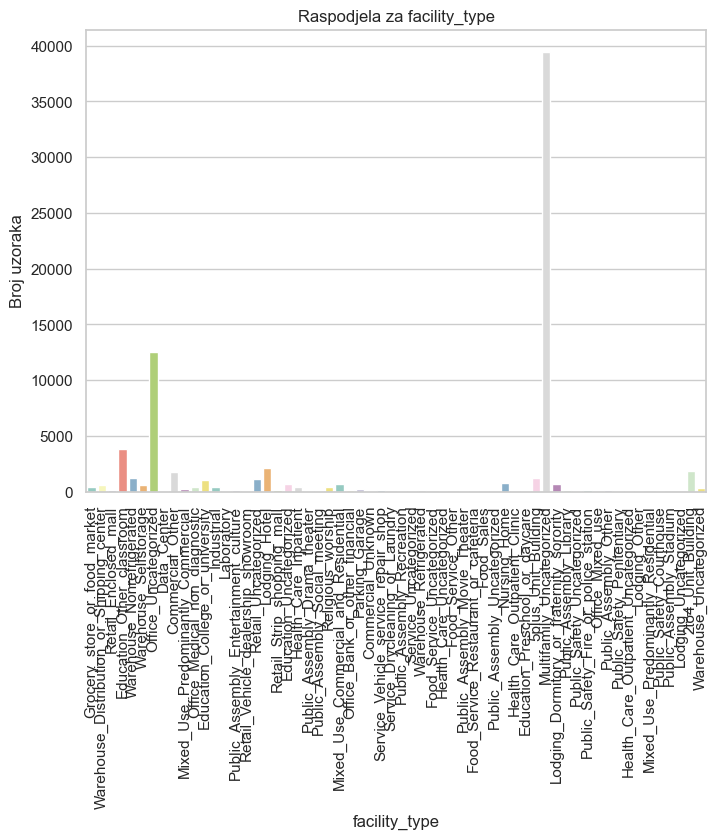

In [4]:
# Grafički prikaz za tekstualne vrijednosti
categorical_data = data.select_dtypes(include=['object'])
for column in categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue=column ,palette="Set3")
    plt.title(f'Raspodjela za {column}')
    plt.xlabel(column)
    plt.ylabel('Broj uzoraka')
    plt.xticks(rotation=90)
    plt.show()

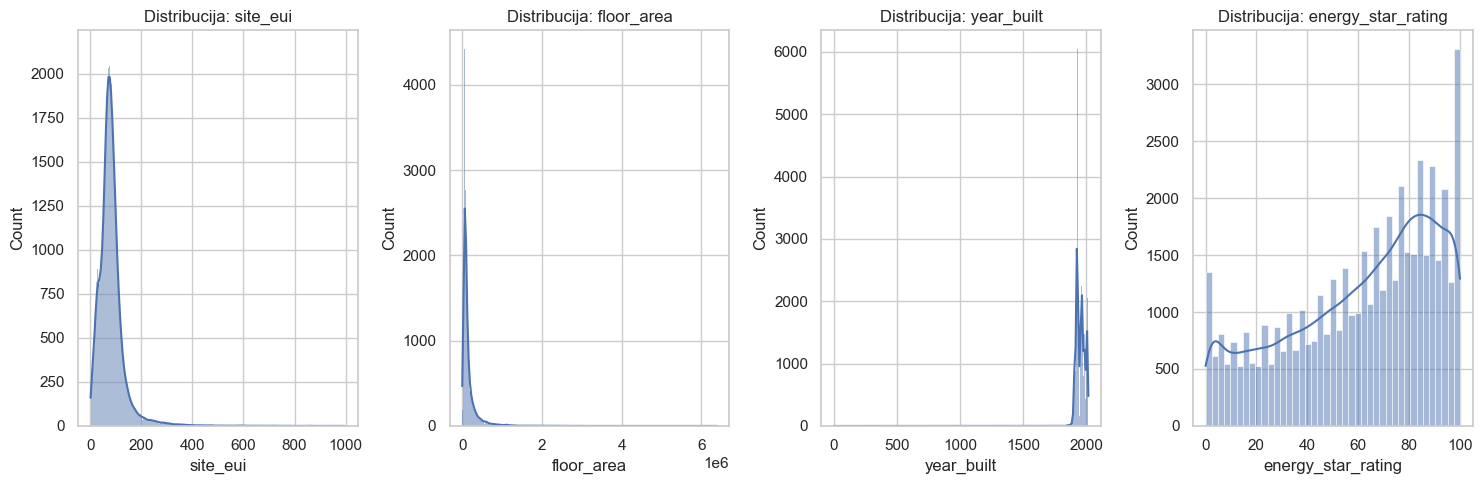

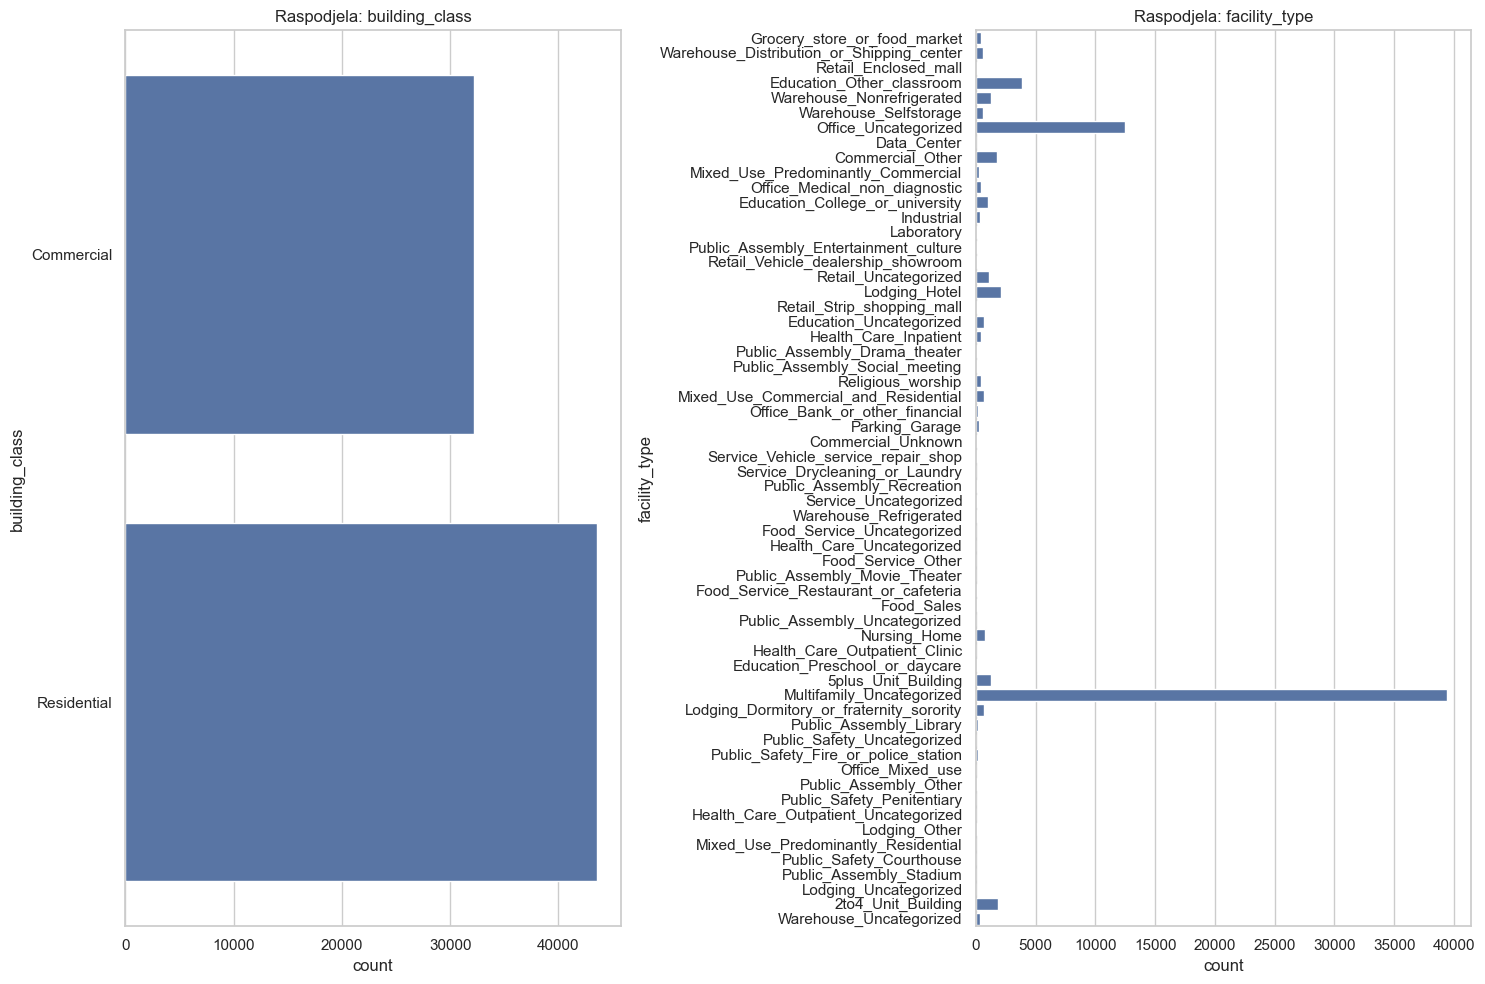

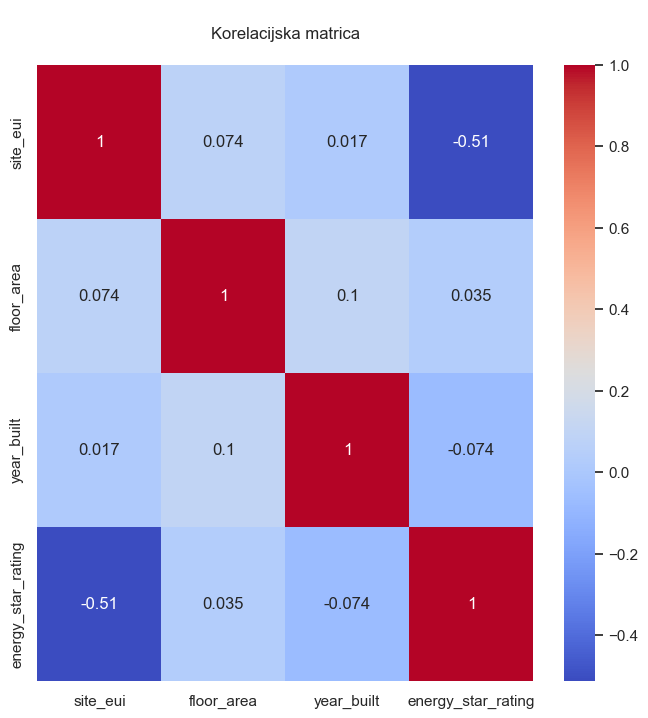

In [27]:
# Definiranje ključnih varijabli za analizu
key_variables = ['site_eui', 'floor_area', 'year_built', 'building_class', 'facility_type', 'energy_star_rating']

# Vizualizacija raspodjele za numeričke varijable
numerical_vars = ['site_eui', 'floor_area', 'year_built', 'energy_star_rating']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_vars):
    plt.subplot(1, len(numerical_vars), i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribucija: {col}')
plt.tight_layout()
plt.show()

# Vizualizacija raspodjele za tekstualne varijable
categorical_vars = ['building_class', 'facility_type']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_vars):
    plt.subplot(1, len(categorical_vars), i + 1)
    sns.countplot(y=data[col])
    plt.title(f'Raspodjela: {col}')
plt.tight_layout()
plt.show()

# Matrični prikaz korelacija
correlation_matrix = data[key_variables].select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('\nKorelacijska matrica\n')
plt.show()

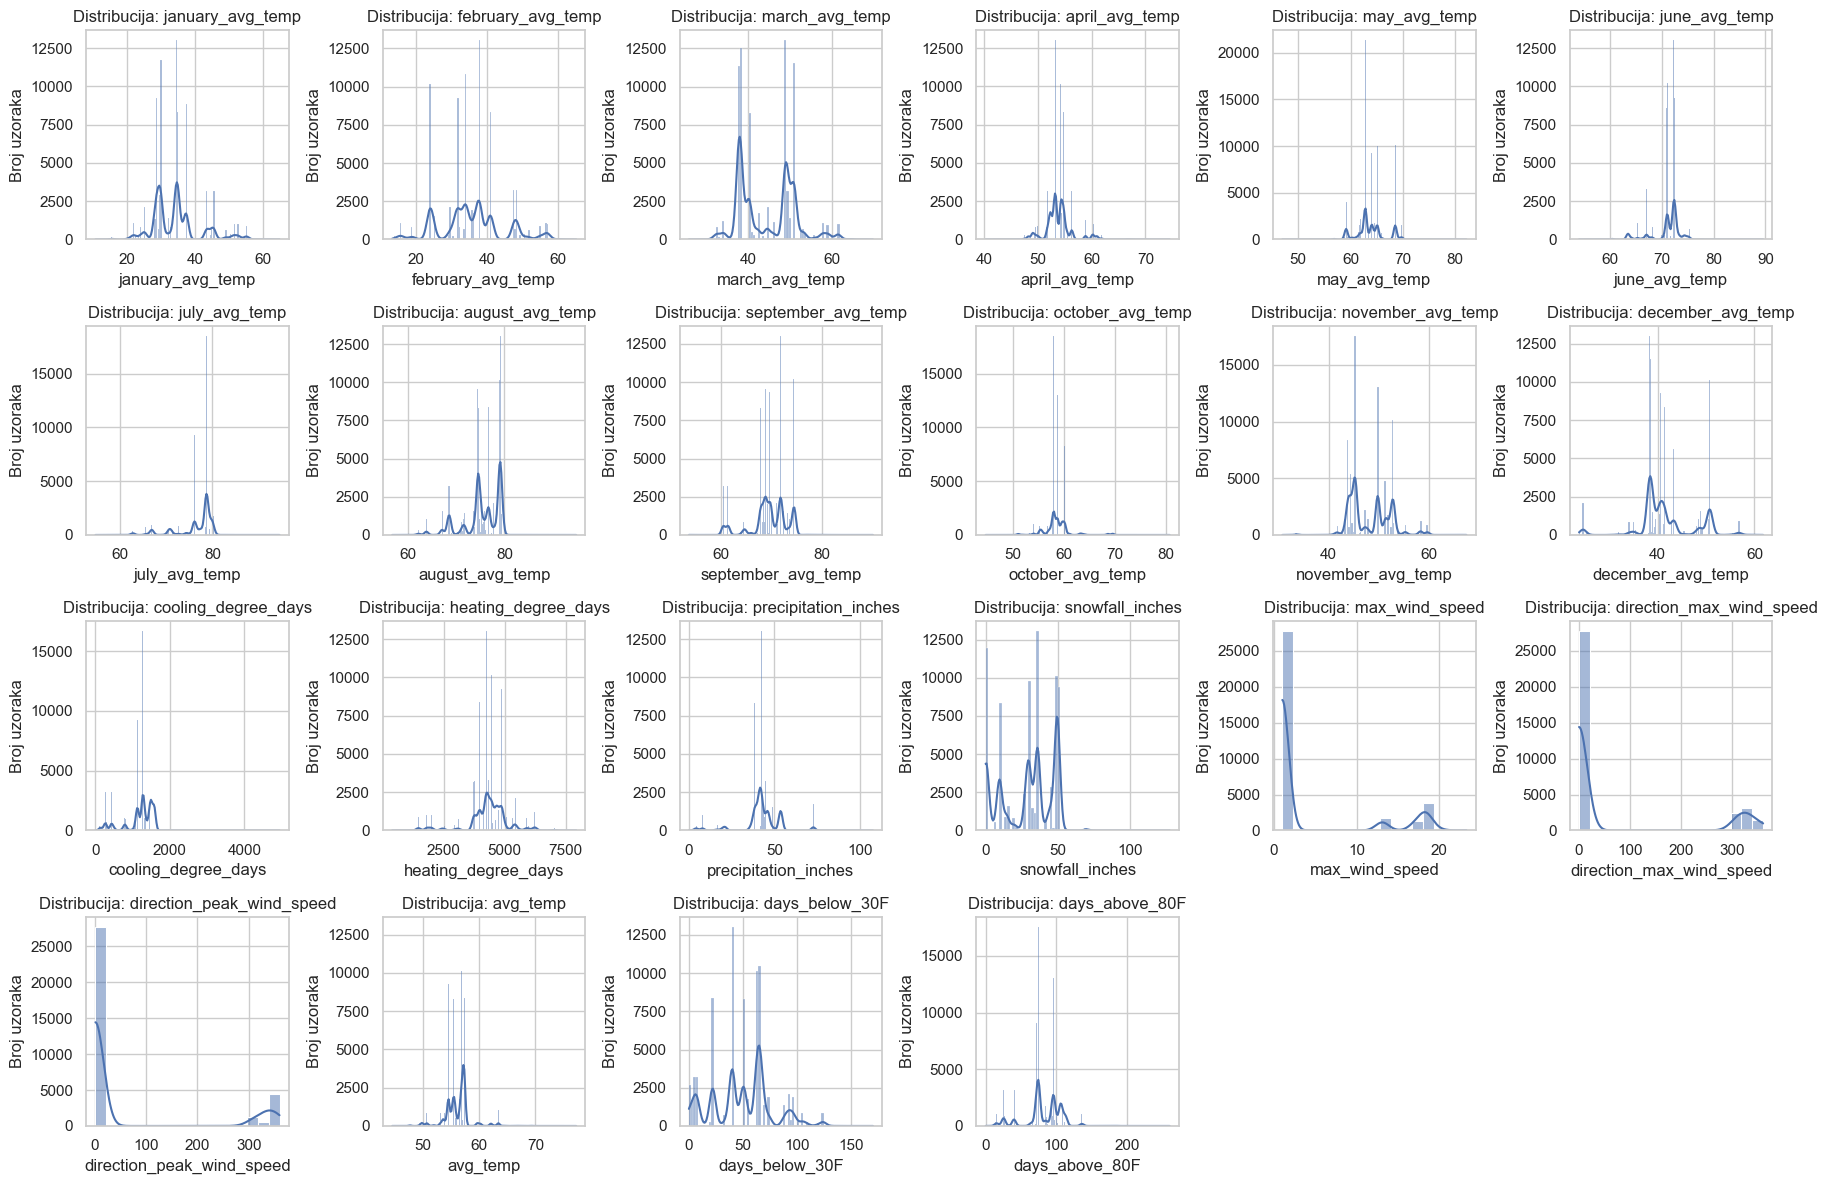

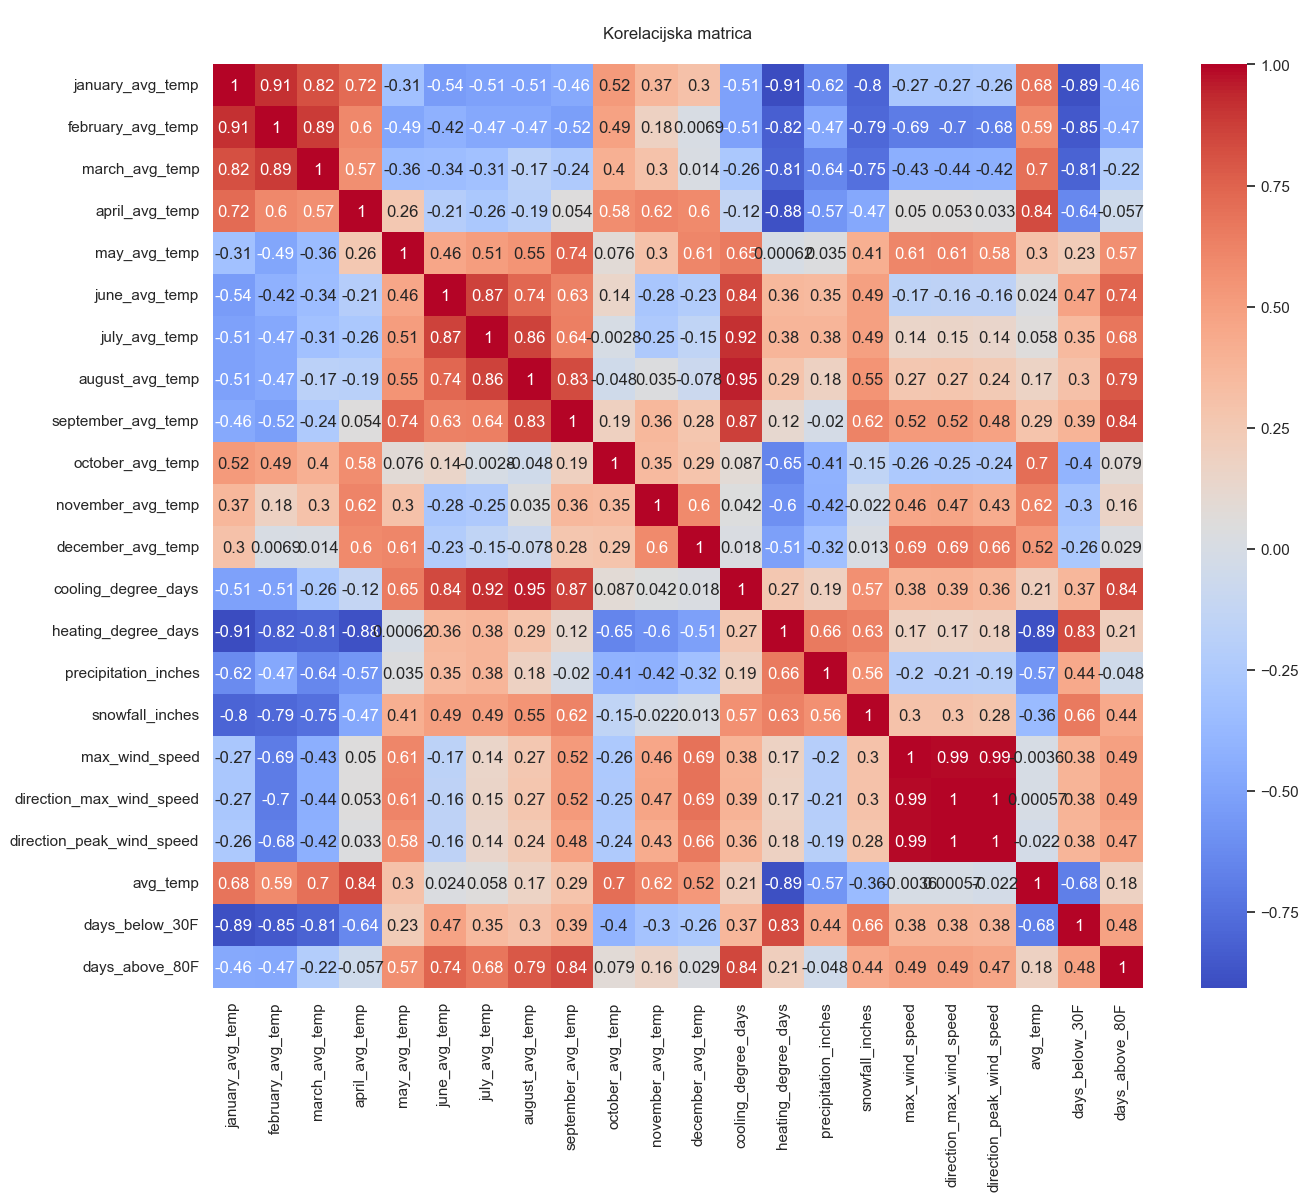

In [26]:
# Definiranje ključnih varijabli za analizu
key_variables = ['january_avg_temp', 'february_avg_temp', 'march_avg_temp',
                 'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
                 'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
                 'november_avg_temp', 'december_avg_temp',
                 'cooling_degree_days', 'heating_degree_days',
                 'precipitation_inches', 'snowfall_inches',
                 'max_wind_speed', 'direction_max_wind_speed', 'direction_peak_wind_speed',
                 'avg_temp', 'days_below_30F', 'days_above_80F']

# Vizualizacija raspodjele za numeričke varijable
plt.figure(figsize=(18, 12))
for i, col in enumerate(key_variables):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribucija: {col}')
    plt.xlabel(col)
    plt.ylabel('Broj uzoraka')
plt.tight_layout()
plt.show()

# Matrični prikaz korelacija
correlation_matrix = data[key_variables].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('\nKorelacijska matrica\n')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identifikacija tekstualnih stupaca
categorical_cols = ['building_class', 'facility_type']

# Identifikacija numeričkih stupaca
numeric_cols = ['floor_area', 'year_built', 'energy_star_rating']

# Odvajanje ciljne varijablu od ulaznih varijabli
X = data[numeric_cols + categorical_cols]
y = data['site_eui']

# Definiranje transformatora za imputaciju tekstualnih i numeričkih varijabli
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Kombinacija transformacije u skupni transformator
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Kreiranje regresijskih modela za analizu podataka
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_gb = GradientBoostingRegressor()

# Stvaranje pipelineova za svaki regeresijski model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rf)])
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_lr)])
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_gb)])

# Podjela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluacija modela
def evaluate_model(pipeline):
    predictions = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Treniranje regresijskih modela
pipeline_rf.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)

# Evaluacija regresijskih modela
mae_rf, mse_rf, r2_rf = evaluate_model(pipeline_rf)
mae_lr, mse_lr, r2_lr = evaluate_model(pipeline_lr)
mae_gb, mse_gb, r2_gb = evaluate_model(pipeline_gb)

# Ispis rezultata
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R^2: {r2_rf}")
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R^2: {r2_lr}")
print(f"Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}, R^2: {r2_gb}")

Random Forest - MAE: 16.77748204529836, MSE: 1238.441764228997, R^2: 0.6383594153270373
Linear Regression - MAE: 28.69687295775518, MSE: 2908.4616474801755, R^2: 0.15069258718964673
Gradient Boosting - MAE: 23.923677855426053, MSE: 2081.869537527413, R^2: 0.39206788844612206


In [8]:
from sklearn.model_selection import cross_val_score

# Primjer unakrsne validacije za Random Forest model
scores = cross_val_score(pipeline_rf, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
print("MAE scores za Random Forest:", -scores)

MAE scores za Random Forest: [18.5370903  19.02059354 19.04167837]


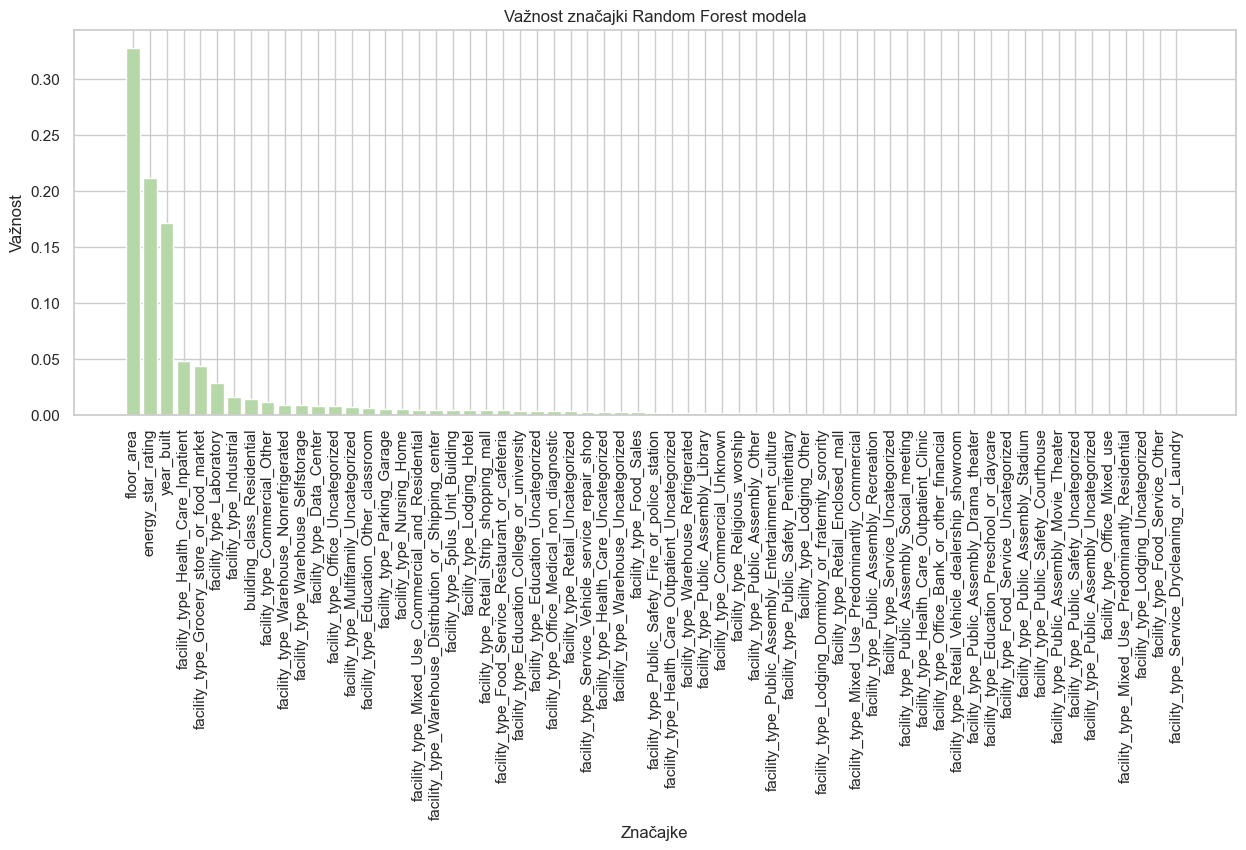

In [21]:
# Grafički prikaz važnosti značajki Random Forest modela
feature_importances = pipeline_rf.named_steps['model'].feature_importances_

try:
    feature_names = preprocessor.transformers_[0][2] + list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
except AttributeError: 
    feature_names = preprocessor.transformers_[0][2] + list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_cols))

# Stvaranje DataFrame-a za lakšu vizualizaciju
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Vizualizacija važnosti značajki
plt.figure(figsize=(15, 5))
plt.bar(importances_df['feature'], importances_df['importance'], color="#b6d7a8")
plt.xlabel('Značajke')
plt.ylabel('Važnost')
plt.title('Važnost značajki Random Forest modela')
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 15]
}

random_search = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist, n_iter=5, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
random_search.fit(X_train, y_train)
print("Najbolji parametri:", random_search.best_params_)

Najbolji parametri: {'model__n_estimators': 100, 'model__max_depth': None}


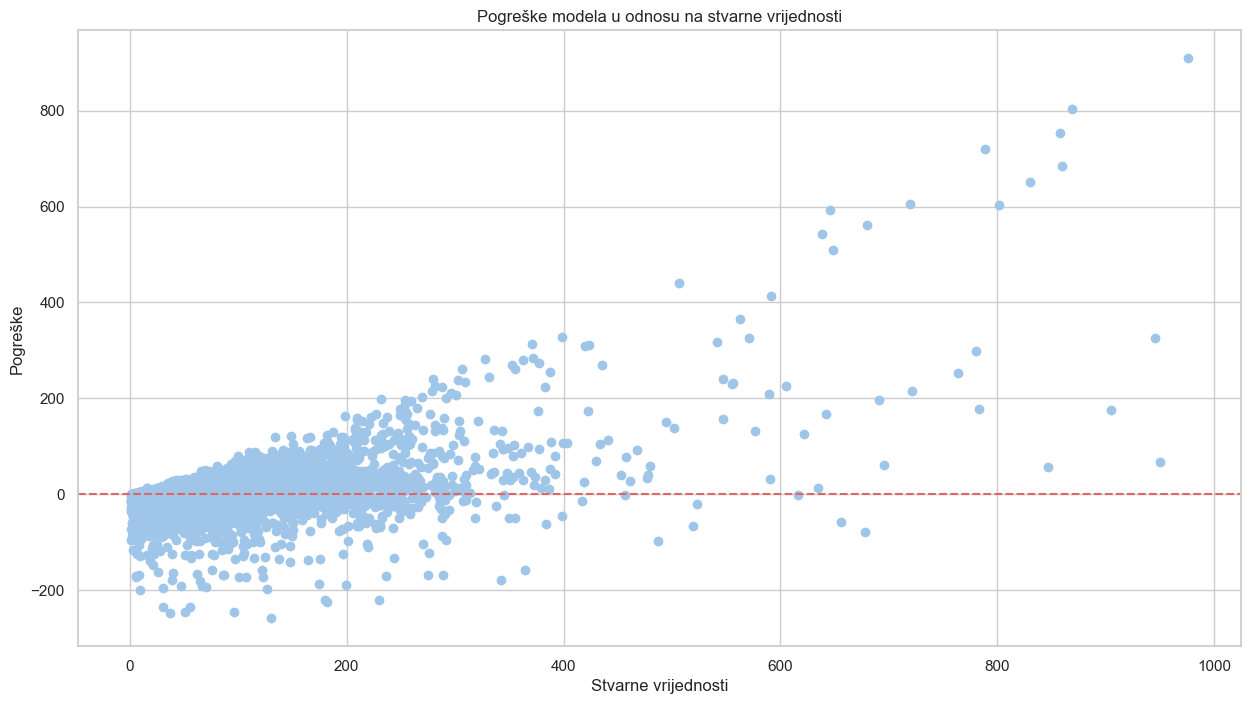

In [20]:
# Dobivanje predviđanja modela
predictions = pipeline_rf.predict(X_test)

# Analiza pogrešaka
errors = y_test - predictions

# Vizualizacija pogrešaka
plt.figure(figsize=(15, 8))
plt.scatter(y_test, errors, color="#9fc5e8")
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Pogreške')
plt.title('Pogreške modela u odnosu na stvarne vrijednosti')
plt.axhline(y=0, color='#e06666', linestyle='--')
plt.show()

In [17]:
best_params_rf = random_search.best_params_

# Evaluacija modela s najboljim parametrima
best_model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', RandomForestRegressor(n_estimators=best_params_rf['model__n_estimators'],
                                                                max_depth=best_params_rf['model__max_depth']))])
best_model_rf.fit(X_train, y_train)
predictions_rf = best_model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, predictions_rf)

# Ispis rezultata
print(f"Optimizirani Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")

Optimizirani Random Forest - MAE: 16.797108543530623, MSE: 1253.84933546615, RMSE: 35.409735038067566, R^2: 0.6338602105751181


In [18]:
# Funkcija za izračun potencijalnih ušteda energije na temelju površine zgrade
def calculate_potential_savings(floor_area, average_savings_per_m2=31):
    return floor_area * average_savings_per_m2

# Funkcija za filtriranje zgrada s niskim ocjenama energetske efikasnosti
def filter_buildings(data, efficiency_threshold=50):
    return data[data['energy_star_rating'] < efficiency_threshold]

# Funkcija koja analizira zgrade i izračunava uštede
def analyze_buildings(data, efficiency_threshold=50):
    low_efficiency_buildings = filter_buildings(data, efficiency_threshold).copy()
    savings_list = []

    for index, building in low_efficiency_buildings.iterrows():
        savings = calculate_potential_savings(building['floor_area'])
        savings_list.append(savings)
        print(f"Zgrada ID {building['id']} ima nisku energetsku efikasnost.")
        print(f"Preporučuje se instalacija solarnih panela za smanjenje troškova i poboljšanje otpornosti.")
        print(f"Procijenjena godišnja ušteda: {savings} kWh\n")
    
    low_efficiency_buildings['savings'] = savings_list
    return low_efficiency_buildings, savings_list

# Analiziranje zgrada i ispisivanje preporuka
low_efficiency_buildings, savings = analyze_buildings(data)

Zgrada ID 0 ima nisku energetsku efikasnost.
Preporučuje se instalacija solarnih panela za smanjenje troškova i poboljšanje otpornosti.
Procijenjena godišnja ušteda: 1898502.0 kWh

Zgrada ID 1 ima nisku energetsku efikasnost.
Preporučuje se instalacija solarnih panela za smanjenje troškova i poboljšanje otpornosti.
Procijenjena godišnja ušteda: 8494000.0 kWh

Zgrada ID 3 ima nisku energetsku efikasnost.
Preporučuje se instalacija solarnih panela za smanjenje troškova i poboljšanje otpornosti.
Procijenjena godišnja ušteda: 1715075.0 kWh

Zgrada ID 12 ima nisku energetsku efikasnost.
Preporučuje se instalacija solarnih panela za smanjenje troškova i poboljšanje otpornosti.
Procijenjena godišnja ušteda: 3977920.0 kWh

Zgrada ID 13 ima nisku energetsku efikasnost.
Preporučuje se instalacija solarnih panela za smanjenje troškova i poboljšanje otpornosti.
Procijenjena godišnja ušteda: 19120583.0 kWh

Zgrada ID 24 ima nisku energetsku efikasnost.
Preporučuje se instalacija solarnih panela za 

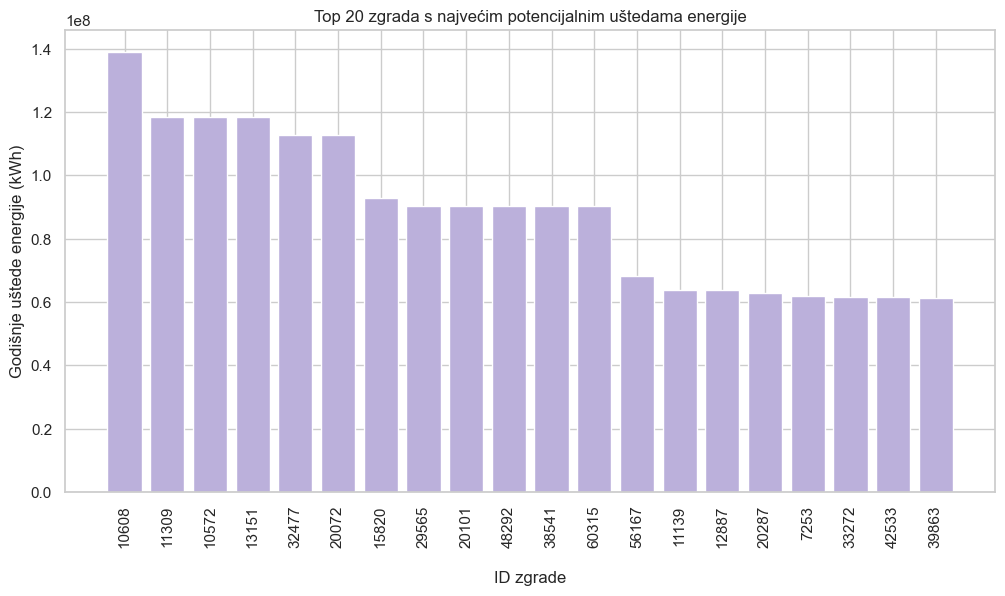

In [24]:
# Dodavanje ušteda u DataFrame zajedno s ID-om zgrade
low_efficiency_buildings['savings'] = savings

# Sortiranje zgrada prema uštedama i prikaz top 20, zbog ljepšeg vizualnog izgleda grafa
top_savings_buildings = low_efficiency_buildings.sort_values(by='savings', ascending=False).head(20)

# Vizualizacija top 20 zgrada
plt.figure(figsize=(12, 6))
plt.bar(top_savings_buildings['id'].astype(str), top_savings_buildings['savings'], color='#bbb0db')
plt.xlabel('\nID zgrade')
plt.ylabel('Godišnje uštede energije (kWh)')
plt.title('Top 20 zgrada s najvećim potencijalnim uštedama energije')
plt.xticks(rotation=90)
plt.show()